# <font color='Red'>Diabetes  Prediction ML Model
### Name :         Riyas Shahul
### Organization : Entri Elevate
### Date :         29/07/2024

# <font color='Red'> Table of Contents 

1. Overview of Problem Statement
2. Objective
3. Data Collection
4. Data Description
5. Exploratory Data Analysis (EDA)
6. Data Preprocessing
7. Visualization
8. Feature Engineering
9. Data Splitting
10. Model Selection
11. Model Training & Evaluation
12. Feature Selection
13. Model Evaluation
14. Hyperparameter Tuning
15. Results
16. Model Deployment
17. Limitations
18. Conclusion
19. Future Work

## <font color='Red'> 1. Overview of Problem Statement

#### Problem Context and Relevance


Diabetes is a chronic health condition that affects how the body processes blood sugar (glucose). Managing and predicting diabetes risk is crucial for improving patient outcomes and reducing healthcare costs. Early detection of diabetes can lead to better management strategies, potentially delaying or preventing the onset of complications.

## <font color='Red'> 2. Objective

The primary objective of this analysis is to build a predictive model that can accurately classify individuals as diabetic or non-diabetic based on various health-related features present in the dataset. This predictive model can aid healthcare professionals in identifying at-risk individuals, allowing for timely intervention and management.

#### Problem Statement

Predicting the likelihood of diabetes in individuals based on a range of health indicators and lifestyle factors 

In [177]:
#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

## <font color='Red'> 3. Data Collection 

In [178]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

using Tab after anything give searchable things example (import then click Tab for libraries search easy to find panda,numpy etc..)

In [179]:
df = pd.read_csv("D:\Jupyter Notebook\Entri Main Project\diabetes_data.csv\diabetes_data.csv")
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


## <font color='Red'> 4. Data Description

1. **Age** : 13-level age category
1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 /
6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 /
11 = 70-74 / 12 = 75-79 / 13 = 80 or older

|1|2|3|4|5|6|7|8|9|10|11|12|13|
|----|----|----|----|----|----|----|----|----|----|----|----|----|
|18-24|25-29|30-34|35-39|40-44|45-49|50-54|55-59|60-64|65-69|70-74|75-79|80 or old|

2. **Sex** : patient's gender
0 = female
1 = male

3. **HighChol** :
0 = no high cholesterol
1 = high cholesterol

4. **CholCheck** :
0 = no cholesterol check in 5 years
1 = yes cholesterol check in 5 years

5. **BMI** : Body Mass Index
 
6. **Smoker** : Have you smoked at least 100 cigarettes in your entire life?
[Note: 5 packs = 100 cigarettes]
0 = no
1 = yes

7. **HeartDiseaseorAttack** : coronary heart disease (CHD) or myocardial infarction (MI)
0 = no
1 = yes

8. **PhysActivity** : physical activity in past 30 days - not including job
0 = no
1 = yes

9. **Fruits** : Consume Fruit 1 or more times per day
0 = no
1 = yes

10. **Veggies** : Consume Vegetables 1 or more times per day
0 = no
1 = yes

11. **HvyAlcoholConsump** : adult men >=14 drinks per week; adult women>=7 drinks pe
0 = no
1 = yes

12. **GenHlth** : Would you say that in general your health is: scale 1-5
1 = excellent
2 = very good
3 = good
4 = fair
5 = poor

13. **MentHlth** : days of poor mental health scale 1-30 days
1 = excellent
...
30 = poor

14. **PhysHlth** : physical illness or injury days in past 30 days scale 1-30
1 = excellent
...
30 = poor

15. **DiffWalk** : Do you have serious difficulty walking or climbing stairs?
0 = no
1 = yes

16. **Stroke** : you ever had a stroke.
0 = no
1 = yes

17. **HighBP** : BP : Blood Pressure
0 = no high BP
1 = high BP

18. **Diabetes** :
0 = no diabetes
1 = diabetes

**Dataset Size**  
Number of records The total number of records in the dataset s 70692, Number of features: 18

Data set From Kaggle   
[Dataset](https://www.kaggle.com/datasets/prosperchuks/health-dataset/data)

## <font color='Red'> 5. EDA (Exploratory Data Analysis)

### Shape of Dataset ###

In [180]:
df.shape

(70692, 18)

There are 70692 Rows and 18 Columns in the dataset

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

From the above information we can observe that

All the columns are numerical in nature, therefore no data type conversion is required to build the model. none of the columns consist of null values. As we know that the dataset consists of 70692 entries and each column has 70692 non null values associated to it , and all Colums are **Float datatype**

In [182]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
df.tail()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0
70691,9.0,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0


In [184]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

## Checking of null values ##

In [185]:
# Finding missing values
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [186]:
# percentage of missing values
df.isnull().sum()/df.shape[0]*100

Age                     0.0
Sex                     0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Stroke                  0.0
HighBP                  0.0
Diabetes                0.0
dtype: float64

If  percentage of missing values is greater than 50 % , We can drop that values 
As for here there is no missing values here

## Checking for Duplicates 

In [187]:
#Finding Duplicates
df.duplicated().sum()

6672

In [188]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool

In [189]:
df = df.drop_duplicates()
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [190]:
df.duplicated().sum()

0

In [191]:
df.shape

(64020, 18)

After removing the duplicates the rows reduced from 70692  to 64020

In [192]:
df.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

In [193]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,64020.0,8.607420,2.860717,1.0,7.0,9.0,11.0,13.0
Sex,64020.0,0.455983,0.498063,0.0,0.0,0.0,1.0,1.0
HighChol,64020.0,0.539550,0.498437,0.0,0.0,1.0,1.0,1.0
CholCheck,64020.0,0.973211,0.161466,0.0,1.0,1.0,1.0,1.0
BMI,64020.0,30.178554,7.287730,12.0,25.0,29.0,34.0,98.0
Smoker,64020.0,0.490706,0.499918,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,64020.0,0.159950,0.366563,0.0,0.0,0.0,0.0,1.0
PhysActivity,64020.0,0.678366,0.467107,0.0,0.0,1.0,1.0,1.0
Fruits,64020.0,0.590862,0.491679,0.0,0.0,1.0,1.0,1.0
Veggies,64020.0,0.771587,0.419813,0.0,1.0,1.0,1.0,1.0


**Age**: The average age is approximately 8.6 years, with a standard deviation of 2.86. The ages range from 1 to 13 years.

**Sex**: The dataset is nearly balanced, with males making up about 45.6%.

**HighChol**: About 53.9% of the individuals have high cholesterol.

**CholCheck**: Almost all individuals (97.3%) have had a cholesterol check in the past five years.

**BMI**: The average BMI is around 30.18, with a wide range from 12 to 98.

**Smoker:** About 49.1% of the individuals are smokers.

**HeartDiseaseorAttack**: Approximately 16% have had a heart disease or attack.

**PhysActivity**: About 67.8% engage in physical activity.

**Fruits**: Around 59.1% consume fruits.

**Veggies**: A high percentage (77.2%) consume vegetables.

**HvyAlcoholConsump**: Only 4.6% are heavy alcohol consumers.

**GenHlth**: The general health rating averages at 2.92 on a scale of 1 to 5.

**MentHlth**: The average number of days of poor mental health is about 4.13 days per month.

**PhysHlth**: The average number of days of poor physical health is approximately 6.39 days per month.

**DiffWalk**: About 27.7% have difficulty walking.

**Stroke**: 6.9% have had a stroke.

**HighBP**: Approximately 58.2% have high blood pressure.

**Diabetes**: 52.2% of the individuals have diabetes.

### Identify Numerical and Categorical columns ###

In [194]:
#Numerical Columns

num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [195]:
# Categorical columns

cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index([], dtype='object')

Out of 18 colums there is no Categorcal Column

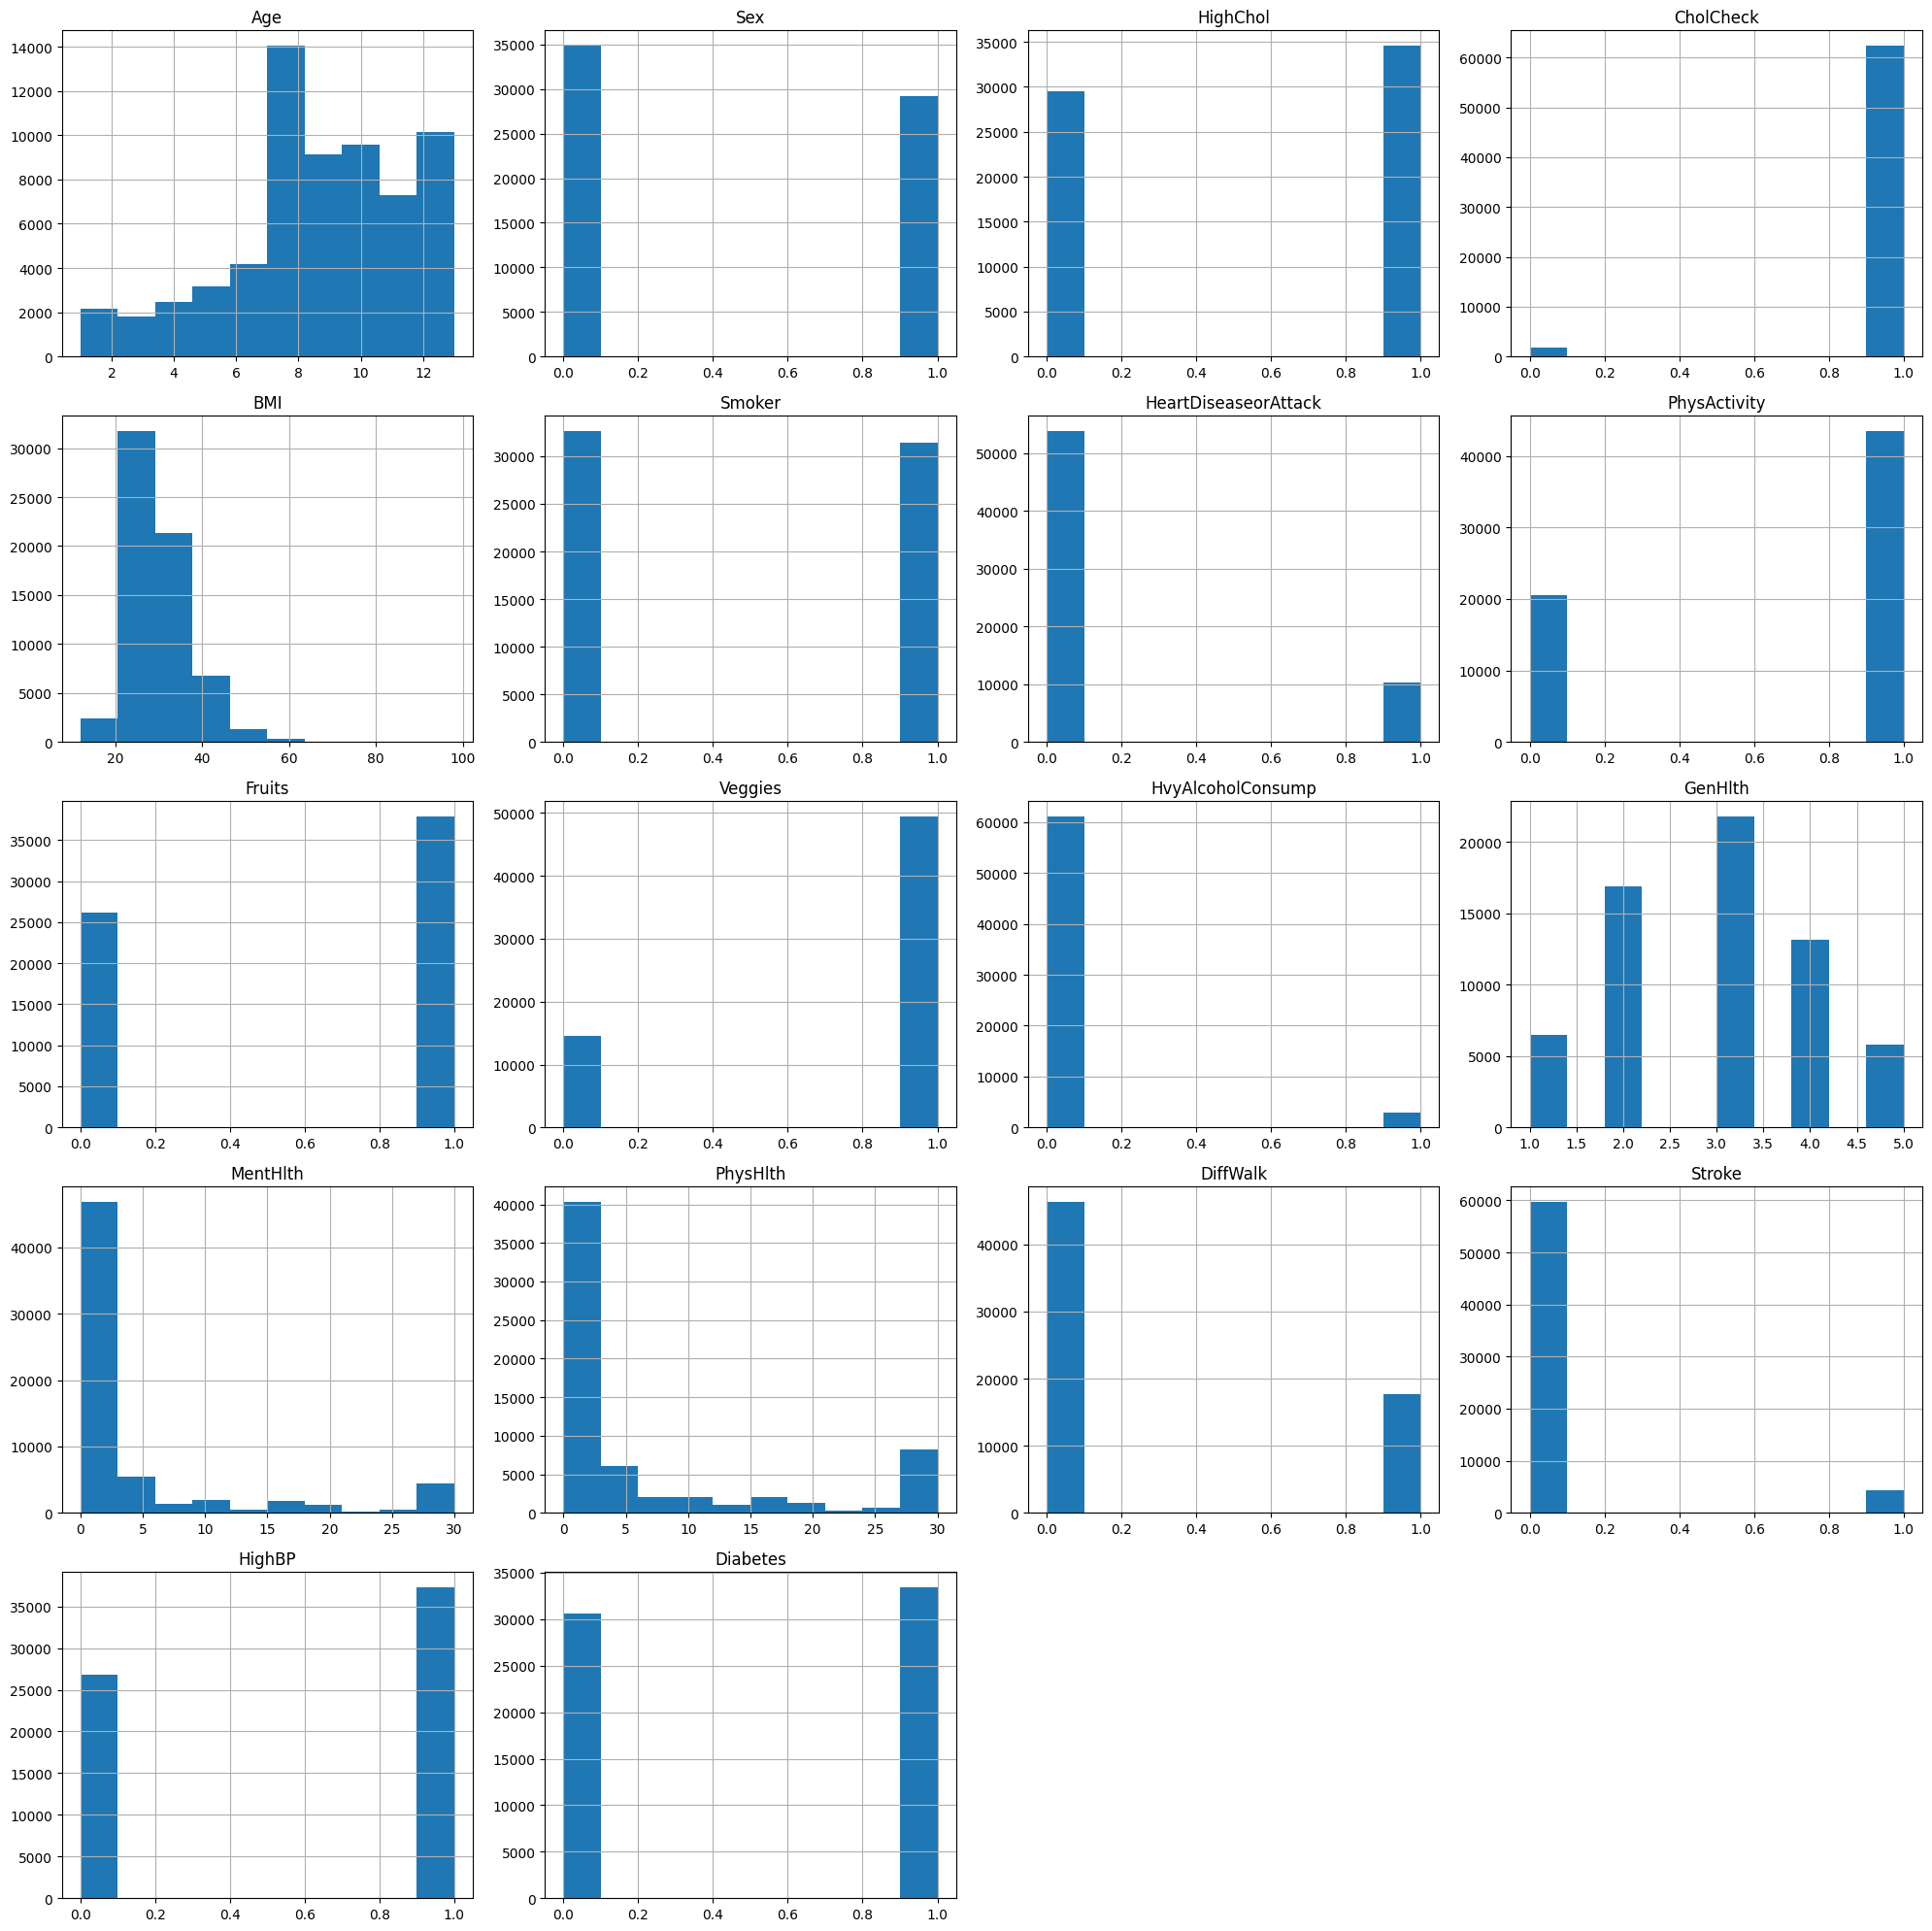

In [196]:
#Histograms 
df.hist (figsize=(20,20))

plt.tight_layout()
plt.show()


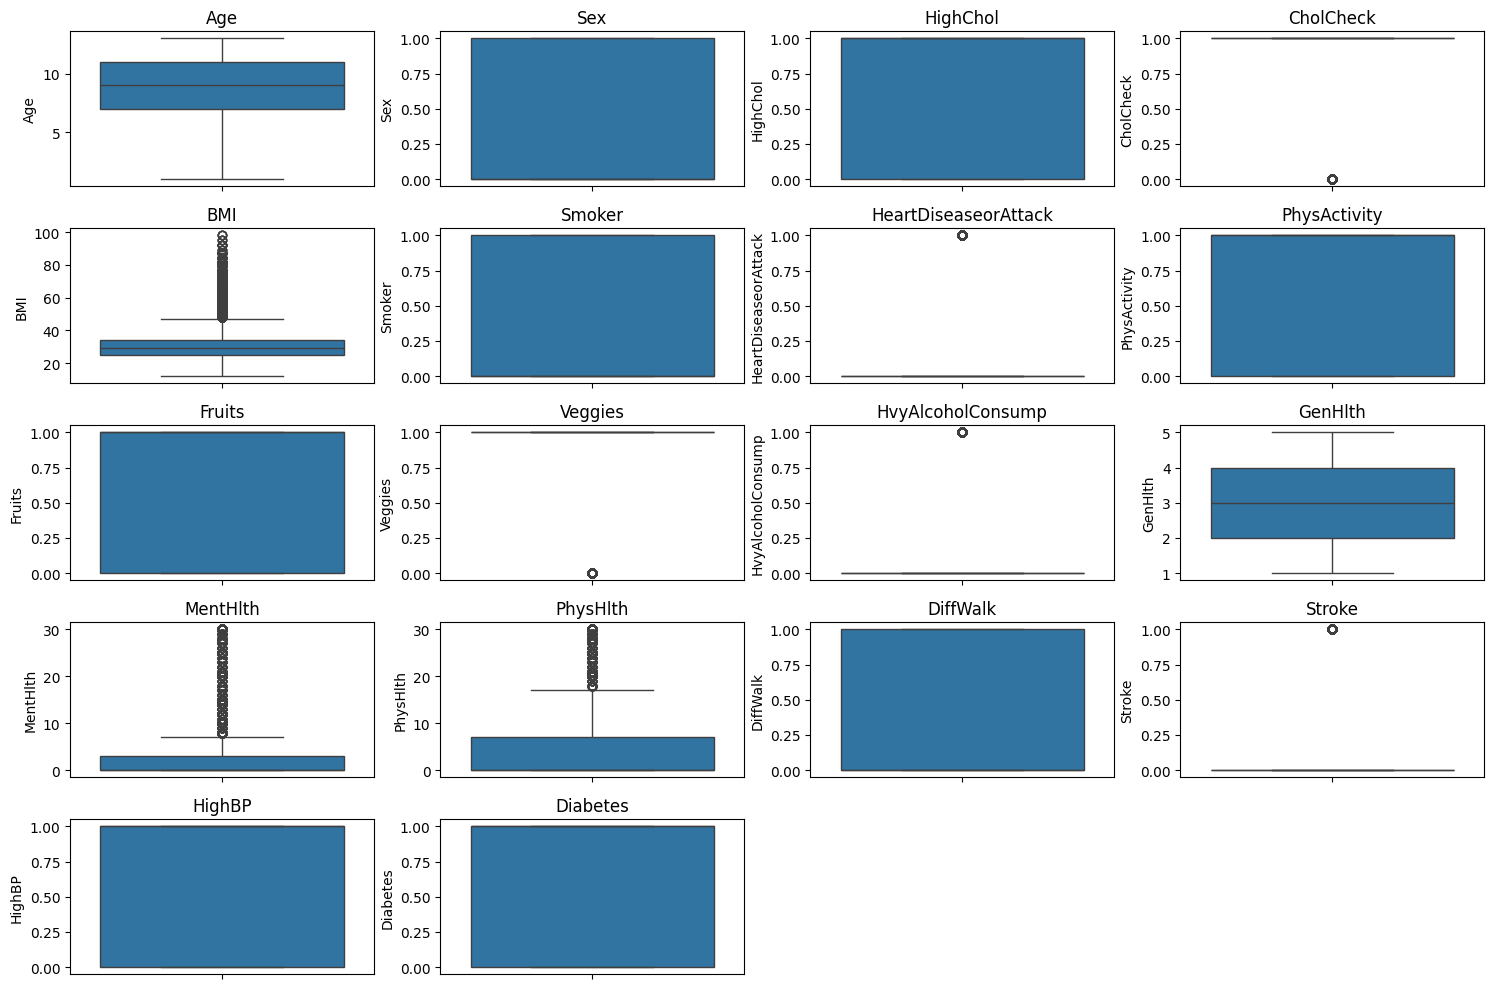

In [197]:
#box plot to identify outliers
plt.figure(figsize=(15, 10))
#enumerate() is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(df):
 plt.subplot(5, 4, i+1)
 sns.boxplot(y=df[col])
 plt.title(col)
plt.tight_layout()
plt.show()

In [198]:
# Distribution of numerical features
numerical_features = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

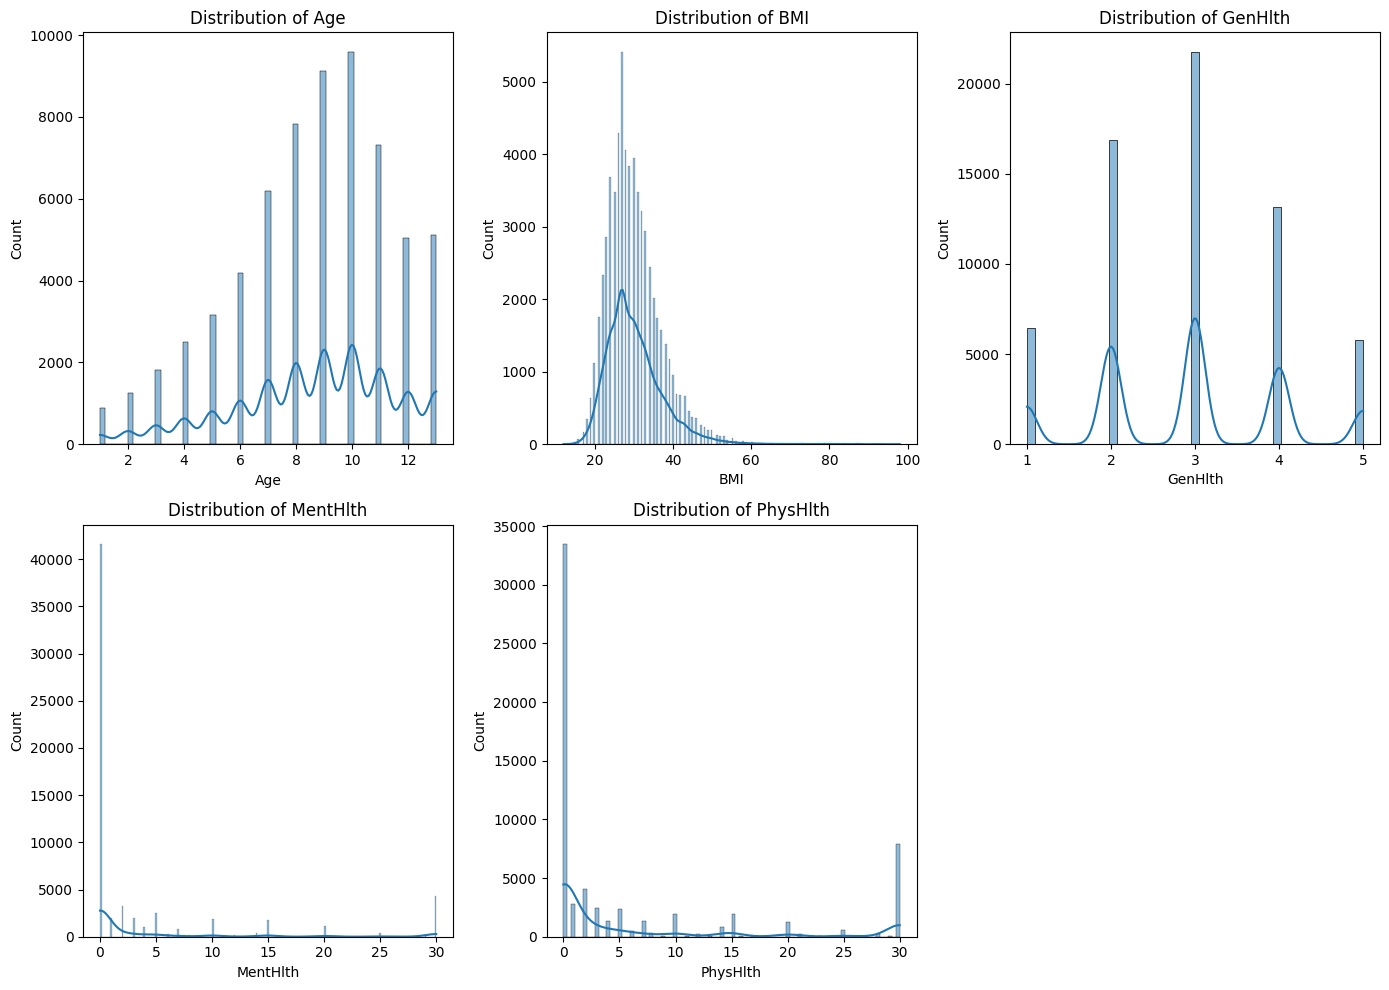

In [199]:
# Relationship between numerical features and target variable

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

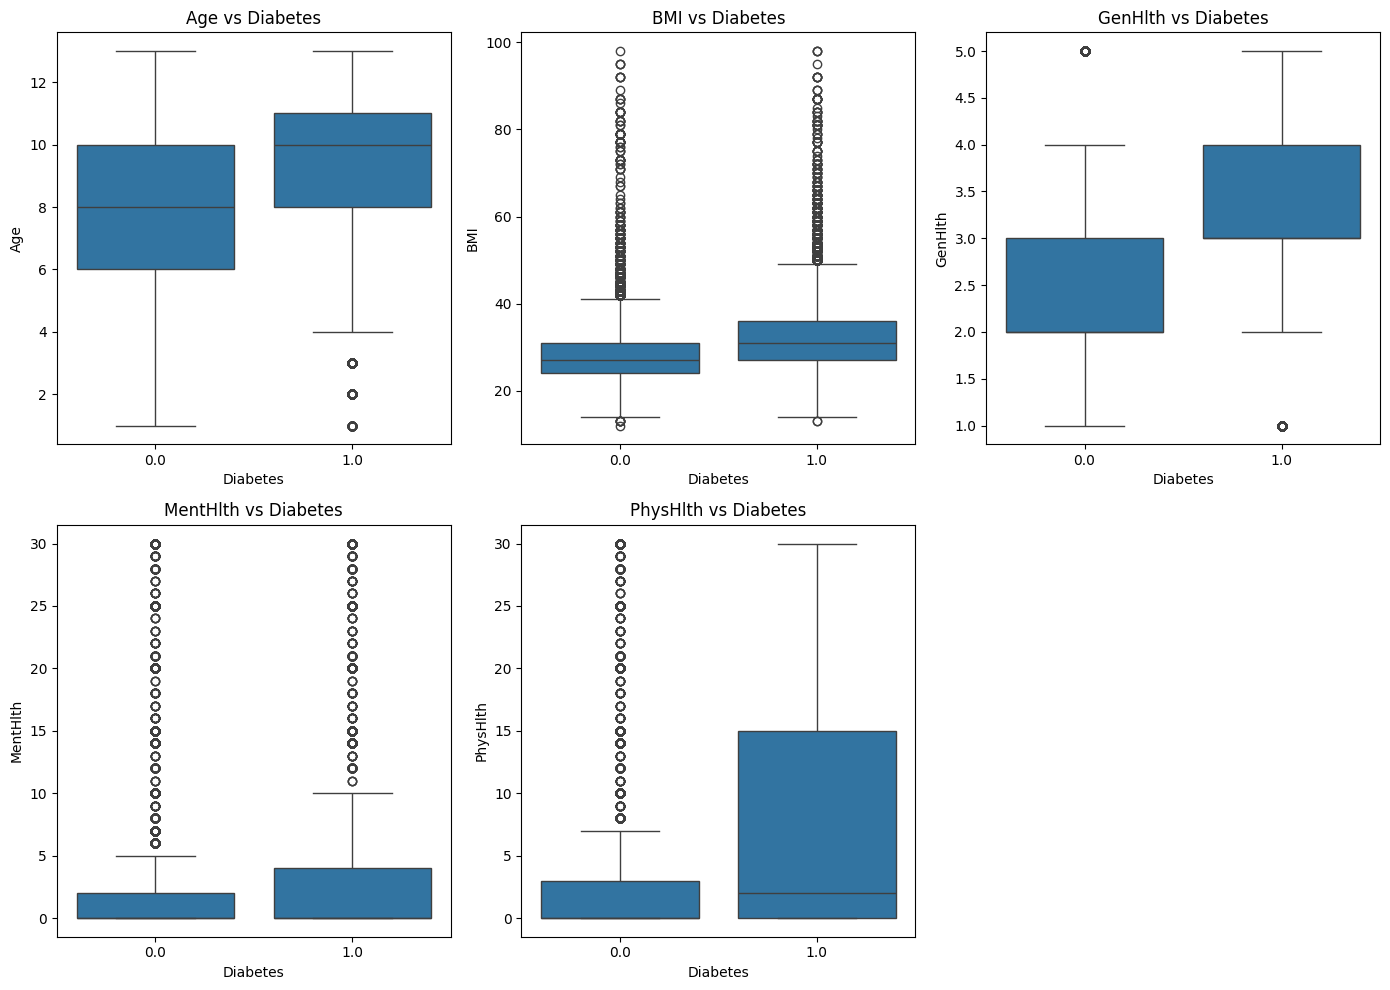

In [200]:
# Relationship between numerical features and target variable
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Diabetes', y=feature, data=df)
    plt.title(f'{feature} vs Diabetes')
plt.tight_layout()
plt.show()

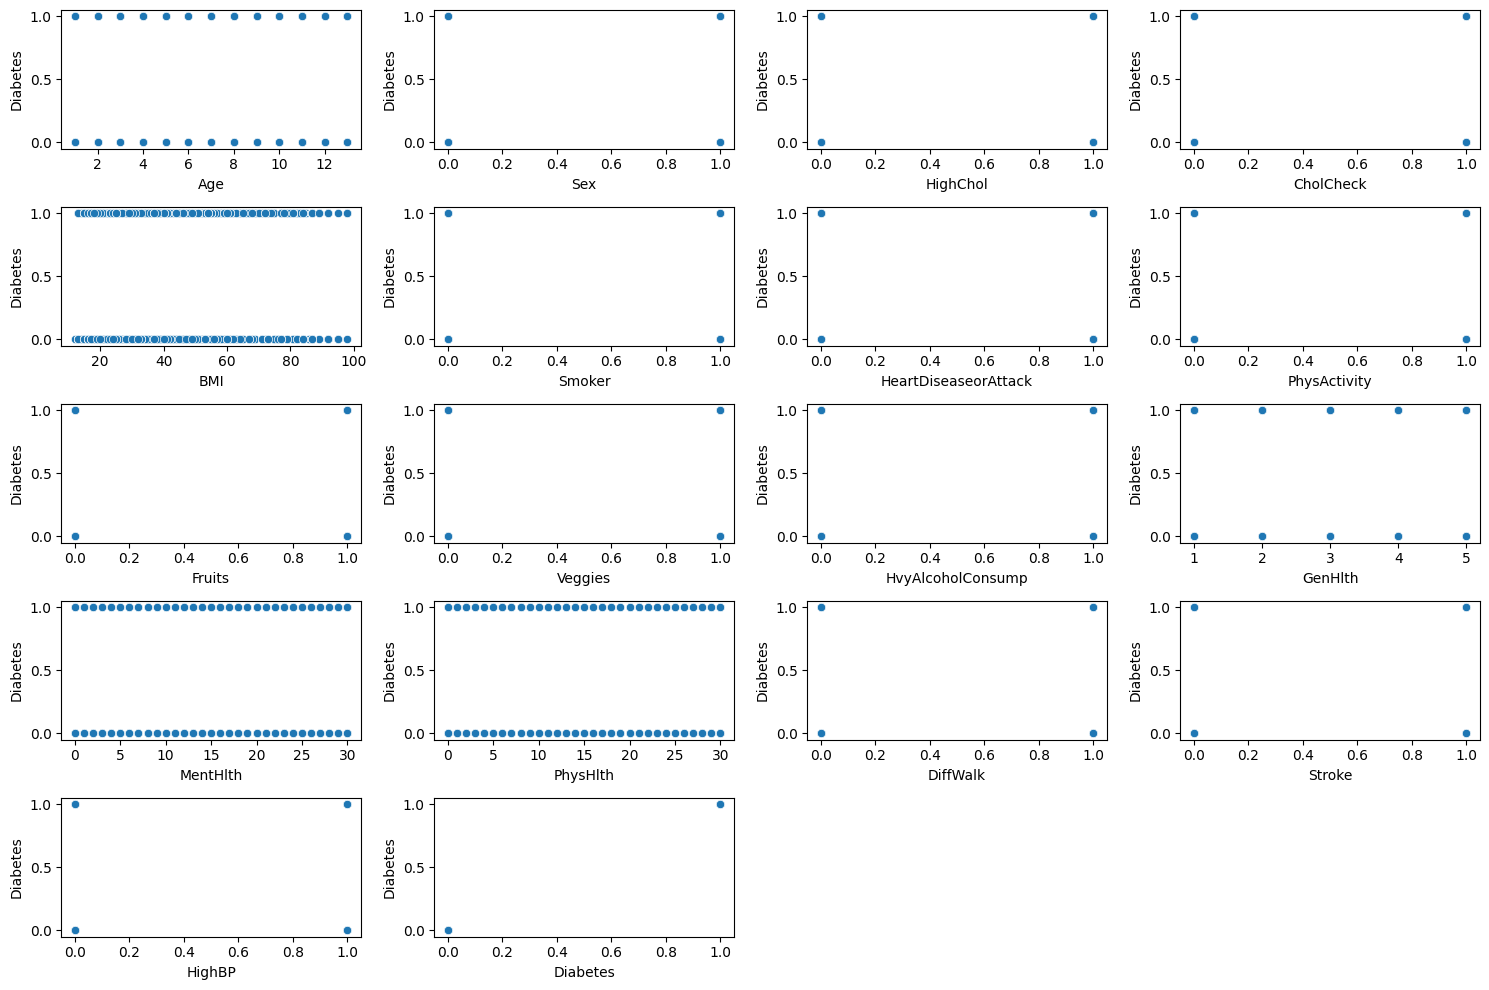

In [201]:
# scatter plot 
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
 plt.subplot(5, 4, i+1)
 sns.scatterplot(data=df,x=col,y='Diabetes')
 plt.xlabel(col)
plt.tight_layout()
plt.show()

In [202]:
#target variable analysis
df["Diabetes"].value_counts()

Diabetes
1.0    33398
0.0    30622
Name: count, dtype: int64

<Axes: xlabel='Diabetes', ylabel='count'>

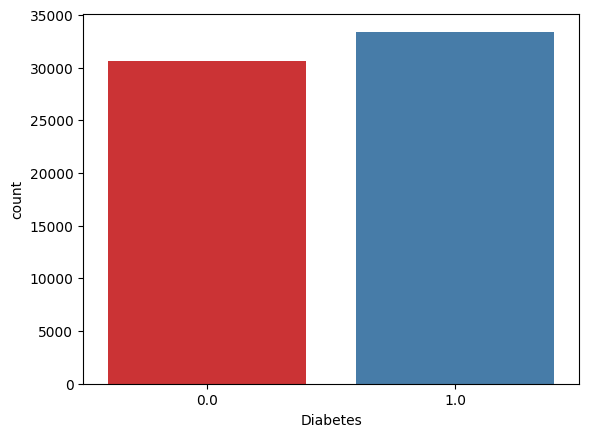

In [203]:
sns.countplot(data= df, x="Diabetes",palette="Set1")

Here we can see where **Diabetes patient is 33398 as 1.0 values** and 
**non Diabetes patient is 30622 as 0.0 values**

In [204]:
df[['Diabetes']].describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes,64020.0,0.521681,0.499534,0.0,0.0,1.0,1.0,1.0


In [205]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
skewness = df.apply(skew)
kurt = df.apply(lambda x: kurtosis(x, fisher=False))
print(skewness)
print(kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]
print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]
print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)


Age                    -0.545099
Sex                     0.176756
HighChol               -0.158698
CholCheck              -5.861482
BMI                     1.669563
Smoker                  0.037182
HeartDiseaseorAttack    1.855359
PhysActivity           -0.763712
Fruits                 -0.369603
Veggies                -1.293857
HvyAlcoholConsump       4.315779
GenHlth                 0.108851
MentHlth                2.224254
PhysHlth                1.512984
DiffWalk                0.996571
Stroke                  3.416137
HighBP                 -0.331484
Diabetes               -0.086805
dtype: float64
Age                      2.783980
Sex                      1.031243
HighChol                 1.025185
CholCheck               35.356972
BMI                      9.829732
Smoker                   1.001383
HeartDiseaseorAttack     4.442358
PhysActivity             1.583256
Fruits                   1.136606
Veggies                  2.674065
HvyAlcoholConsump       19.625948
GenHlth          

### -Skewness
**Positively Skewed Variables** (skew > 1):
BMI, HeartDiseaseorAttack, HvyAlcoholConsump, MentHlth, PhysHlth, Stroke

**Negatively Skewed Variables** (skew < -1):
CholCheck, Veggies

### -Kurtosis
**Platykurtic Distribution** (kurtosis < 3):
Age, Sex, HighChol, Smoker, PhysActivity, Fruits, Veggies, GenHlth, DiffWalk, HighBP, Diabetes

**Leptokurtic Distribution** (kurtosis > 3):
CholCheck, BMI, HeartDiseaseorAttack, HvyAlcoholConsump, MentHlth, PhysHlth, Stroke

This indicates that certain variables like **BMI** and **HvyAlcoholConsump** have a longer tail on the right, while **CholCheck** and **Veggies** are negatively skewed. Leptokurtic variables show heavier tails compared to a normal distribution, indicating more outliers.

### Impact on Model Assumptions
Linear Models: Linear regression and other linear models assume normally distributed residuals. High skewness can violate this assumption, leading to biased coefficients and less reliable predictions.

Decision Trees and Non-linear Models: Models like decision trees, random forests, and gradient boosting machines are less sensitive to the distribution of variables but may still be influenced by the presence of outliers.

## Correlation ##

Text(0.5, 1.0, 'Correlation Matrix - Heatmap')

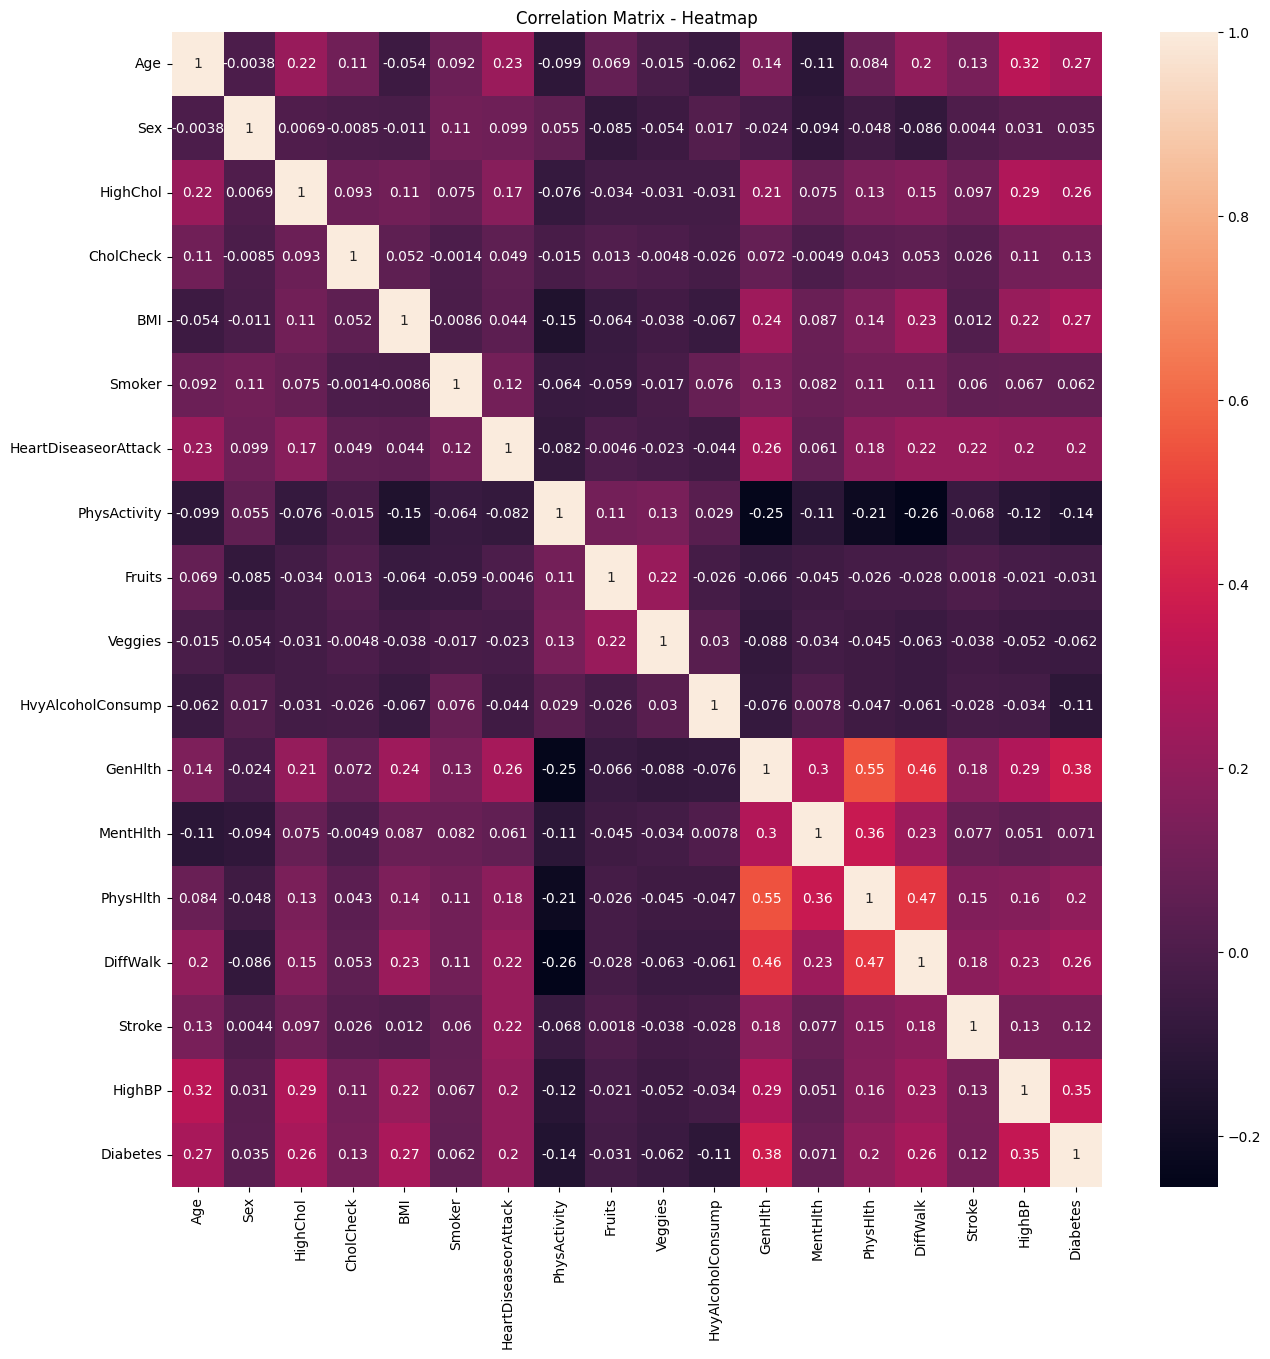

In [206]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr(),annot=True,)
plt.title('Correlation Matrix - Heatmap')

Therer is no columns with multicollinearity  
     

## <font color='Red'> 6. Data Preprocessing 

In [207]:
df1=df.copy()
df1.shape

(64020, 18)

### Remove unnecessary columns

In [208]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64020 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   64020 non-null  float64
 1   Sex                   64020 non-null  float64
 2   HighChol              64020 non-null  float64
 3   CholCheck             64020 non-null  float64
 4   BMI                   64020 non-null  float64
 5   Smoker                64020 non-null  float64
 6   HeartDiseaseorAttack  64020 non-null  float64
 7   PhysActivity          64020 non-null  float64
 8   Fruits                64020 non-null  float64
 9   Veggies               64020 non-null  float64
 10  HvyAlcoholConsump     64020 non-null  float64
 11  GenHlth               64020 non-null  float64
 12  MentHlth              64020 non-null  float64
 13  PhysHlth              64020 non-null  float64
 14  DiffWalk              64020 non-null  float64
 15  Stroke                64

In [209]:
# Drop both 'CholCheck and 'MentHlth' columns cause they are no related diabetes
df1.drop(columns=['CholCheck','MentHlth'], inplace=True)

In [210]:
df1

,Age,Sex,HighChol,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,1.0


After removing the 'CholCheck','MentHlth' columns reduced from 64020  to 60931 

## Handling missing values  ##

In [211]:
df1 = df1.drop_duplicates()
df1

,Age,Sex,HighChol,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,1.0


In [212]:
df1.duplicated().sum()

0

In [213]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 60931, dtype: bool

In [232]:
#identify constant columns
constant_columns = [col for col in df1.columns if df1[col].nunique() <=1]
print ("constant columns : ", constant_columns)

constant columns :  ['HeartDiseaseorAttack', 'Veggies', 'HvyAlcoholConsump', 'Stroke']


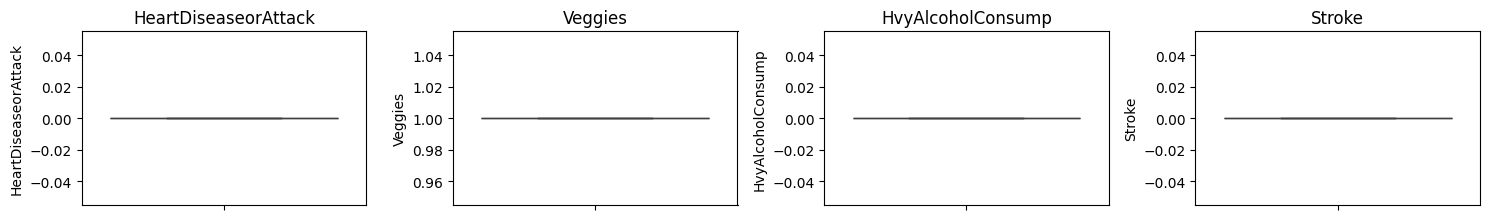

In [233]:
#box plot to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(constant_columns):
 plt.subplot(5, 4, i+1)
 sns.boxplot(y=df1[col])
 plt.title(col)
plt.tight_layout()
plt.show()

In [234]:
# Removing Constant columns
df1.drop(columns=['HeartDiseaseorAttack', 'Veggies', 'HvyAlcoholConsump', 'Stroke'], inplace=True)

In [282]:
df1

,Age,Sex,HighChol,BMI,Smoker,PhysActivity,Fruits,GenHlth,PhysHlth,DiffWalk,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,1.0,0.0,3.0,25.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,1.0,1.0,1.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,37.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,29.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0
70689,13.0,0.0,1.0,25.0,0.0,0.0,1.0,5.0,0.0,1.0,1.0,1.0
70690,11.0,0.0,1.0,18.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,1.0


After removing 'HeartDiseaseorAttack', 'Veggies', 'HvyAlcoholConsump', 'Stroke' reduced from 60931  to 60931 and so we can clearly see that there war no values in them

In [235]:
df1.isnull().sum()

Age             0
Sex             0
HighChol        0
BMI             0
Smoker          0
PhysActivity    0
Fruits          0
GenHlth         0
PhysHlth        0
DiffWalk        0
HighBP          0
Diabetes        0
dtype: int64

In [236]:
df1.nunique()

Age             13
Sex              2
HighChol         2
BMI             37
Smoker           2
PhysActivity     2
Fruits           2
GenHlth          5
PhysHlth        26
DiffWalk         2
HighBP           2
Diabetes         2
dtype: int64

In [237]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60931.0,8.674468,2.841153,1.0,7.0,9.0,11.0,13.0
Sex,60931.0,0.460800,0.498465,0.0,0.0,0.0,1.0,1.0
HighChol,60931.0,0.548752,0.497622,0.0,0.0,1.0,1.0,1.0
BMI,60931.0,30.144188,6.588908,12.0,25.0,29.0,34.0,47.5
Smoker,60931.0,0.497694,0.499999,0.0,0.0,0.0,1.0,1.0
PhysActivity,60931.0,0.667099,0.471255,0.0,0.0,1.0,1.0,1.0
Fruits,60931.0,0.583004,0.493066,0.0,0.0,1.0,1.0,1.0
GenHlth,60931.0,2.958100,1.104428,1.0,2.0,3.0,4.0,5.0
PhysHlth,60931.0,5.978714,9.056684,0.0,0.0,0.0,10.0,25.0
DiffWalk,60931.0,0.288490,0.453064,0.0,0.0,0.0,1.0,1.0


**Age**: The average age is about 8.7 years, with values ranging from 1 to 13 years. The distribution is slightly less variable than before.

**Sex**: The dataset shows a near-equal distribution of genders, with 46.1% being female.

**HighChol**: Approximately 54.9% of individuals have high cholesterol.

**BMI**: The average BMI is around 30.14, with a narrower range from 12 to 47.5.

**Smoke**r: About 49.8% of the individuals are smokers.

**PhysActivity**: Around 66.7% engage in physical activity.

**Fruits**: About 58.3% consume fruits.

**GenHlth**: The average general health rating is approximately 2.96 on a scale of 1 to 5.

**PhysHlth**: The average number of days of poor physical health is about 6.0 days per month.

**DiffWalk**: About 28.8% have difficulty walking.

**HighBP**: Approximately 59.5% have high blood pressure.

**Diabetes**: 53.5% of the individuals have diabetes.

### Handling IQR method is used for outlier treatment ###

Quantiles divide data into intervals.

In [238]:
for feature in df1:
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lw = Q1 - 1.5 * IQR
    uw = Q3 + 1.5 * IQR

    # Check if any values in the feature are outside the bounds
    if df1[(df1[feature] < lw) | (df1[feature] > uw)].any(axis=None):
        print(feature, "yes")  # Feature has outliers
    else:
        print(feature, "no")  # Feature has no outliers


Age no
Sex no
HighChol no
BMI no
Smoker no
PhysActivity no
Fruits no
GenHlth no
PhysHlth no
DiffWalk no
HighBP no
Diabetes no


In [239]:
def whisker(col):
 q1,q3=np.percentile(col,[25,75])
 iqr=q3-q1
 lw=q1-1.5*iqr
 uw=q3+1.5*iqr
 return lw,uw


Percentiles are specific quantiles dividing data into 100 parts.

In [240]:
lw, uw = whisker(df1['Diabetes'])
print(f'Lower whisker: {lw}, Upper whisker:{uw}')

Lower whisker: -1.5, Upper whisker:2.5


In [241]:
for i in df1.select_dtypes(include="number").columns:
 lw,uw=whisker(df1[i])
 df1[i]=np.where(df1[i]<lw,lw,df1[i])
 df1[i]=np.where(df1[i]>uw,uw,df1[i])


#### <font color='Red'> Below is the box plot of orginal data without any changes

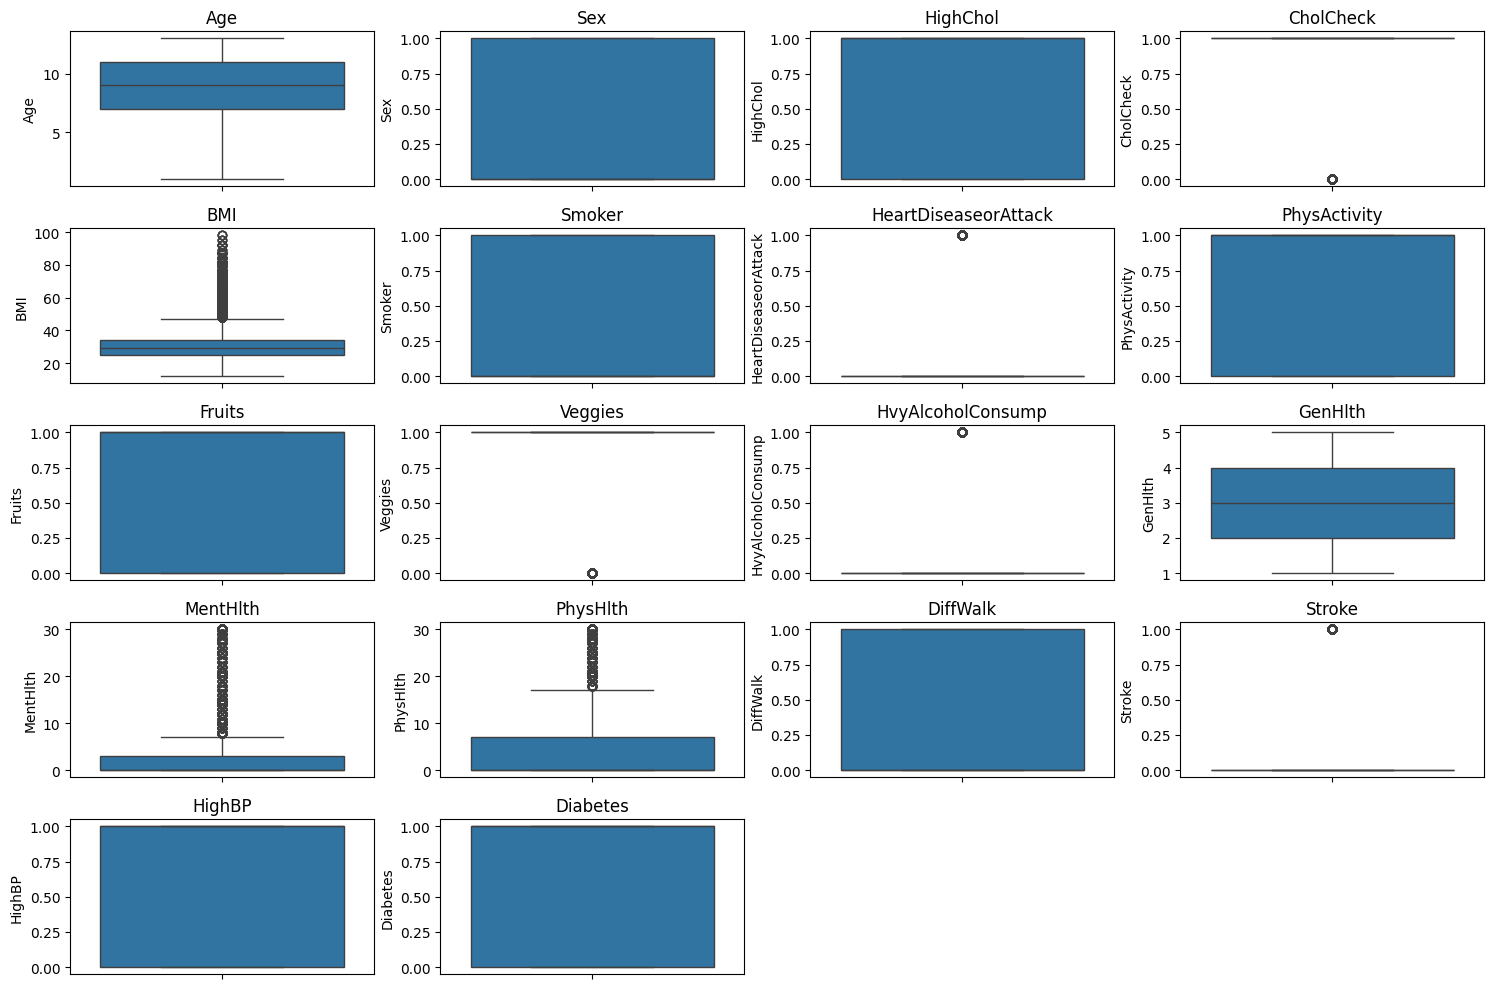

In [242]:
#box plot to identify outliers 
plt.figure(figsize=(15, 10))
numeric_columns = df.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
 plt.subplot(5, 4, i+1)
 sns.boxplot(y=df[col])
 plt.title(col)
plt.tight_layout()
plt.show()

#### <font color='Red'> Below is the box plot of orginal data after correction

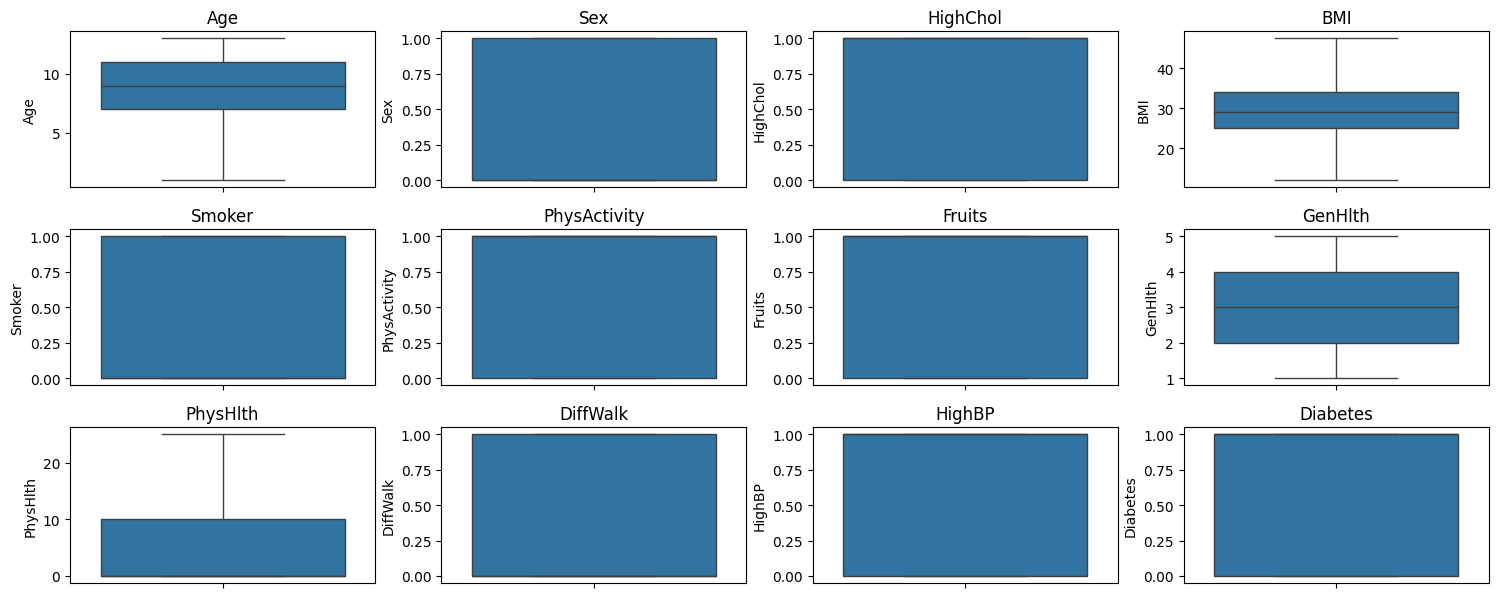

In [243]:
#box plot to after removing outliers
plt.figure(figsize=(15, 10))
numeric_columns = df1.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
 plt.subplot(5, 4, i+1)
 sns.boxplot(y=df1[col])
 plt.title(col)
plt.tight_layout()
plt.show()

All the outliers are removed.


### Checking the skewness and kurtosis after outlier treatment ###


In [244]:
# Calculate skewness and kurtosis
skewness = df1[numeric_columns].apply(skew)
kurt = df1[numeric_columns].apply(lambda x: kurtosis(x, fisher=False))
print(skewness)
print(kurt)
# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]
print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)
# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]
print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)


Age            -0.558240
Sex             0.157284
HighChol       -0.195941
BMI             0.682957
Smoker          0.009224
PhysActivity   -0.709171
Fruits         -0.336687
GenHlth         0.076553
PhysHlth        1.314913
DiffWalk        0.933694
HighBP         -0.385875
Diabetes       -0.140735
dtype: float64
Age             2.817370
Sex             1.024738
HighChol        1.038393
BMI             3.153790
Smoker          1.000085
PhysActivity    1.502923
Fruits          1.113358
GenHlth         2.344339
PhysHlth        3.090693
DiffWalk        1.871784
HighBP          1.148900
Diabetes        1.019806
dtype: float64
Variables with positive skewness (skew > 1):
 PhysHlth    1.314913
dtype: float64
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurtosis < 3):
 Age             2.817370
Sex             1.024738
HighChol        1.038393
Smoker          1.000085
PhysActivity    1.502923
Fruits          1.113358
GenHlth

### -Skewness
**Positively Skewed** (skew > 1):
PhysHlth (1.31): Indicates a right-skewed distribution with a longer tail on the higher end.

**Negatively Skewed**(skew < -1):None

## -Kurtosis
**Platykurtic Distribution** (kurtosis < 3):
Age, Sex, HighChol, Smoker, PhysActivity, Fruits, GenHlth, DiffWalk, HighBP, Diabetes: These variables have lighter tails and fewer extreme outliers compared to a normal distribution.

**Leptokurtic Distribution** (kurtosis > 3):
BMI (3.15), PhysHlth (3.09): These variables have heavier tails and more extreme values compared to a normal distribution, indicating the presence of outliers.

In this dataset the columns 'HeartDiseaseorAttack', 'Veggies', 'HvyAlcoholConsump', 'Stroke' are show nan values after removing outliners and so there was no values left after outliner but befor that there was values which was there even after removing duplicates. In the process of removing outliner the issue of having a binary values can cased trouble for IQR or z-score methods.Thus they were removed we may or may not be able to use there values without removing them.And the answer is unclear untill we work on them 

## <font color='Red'> 7. Visualization

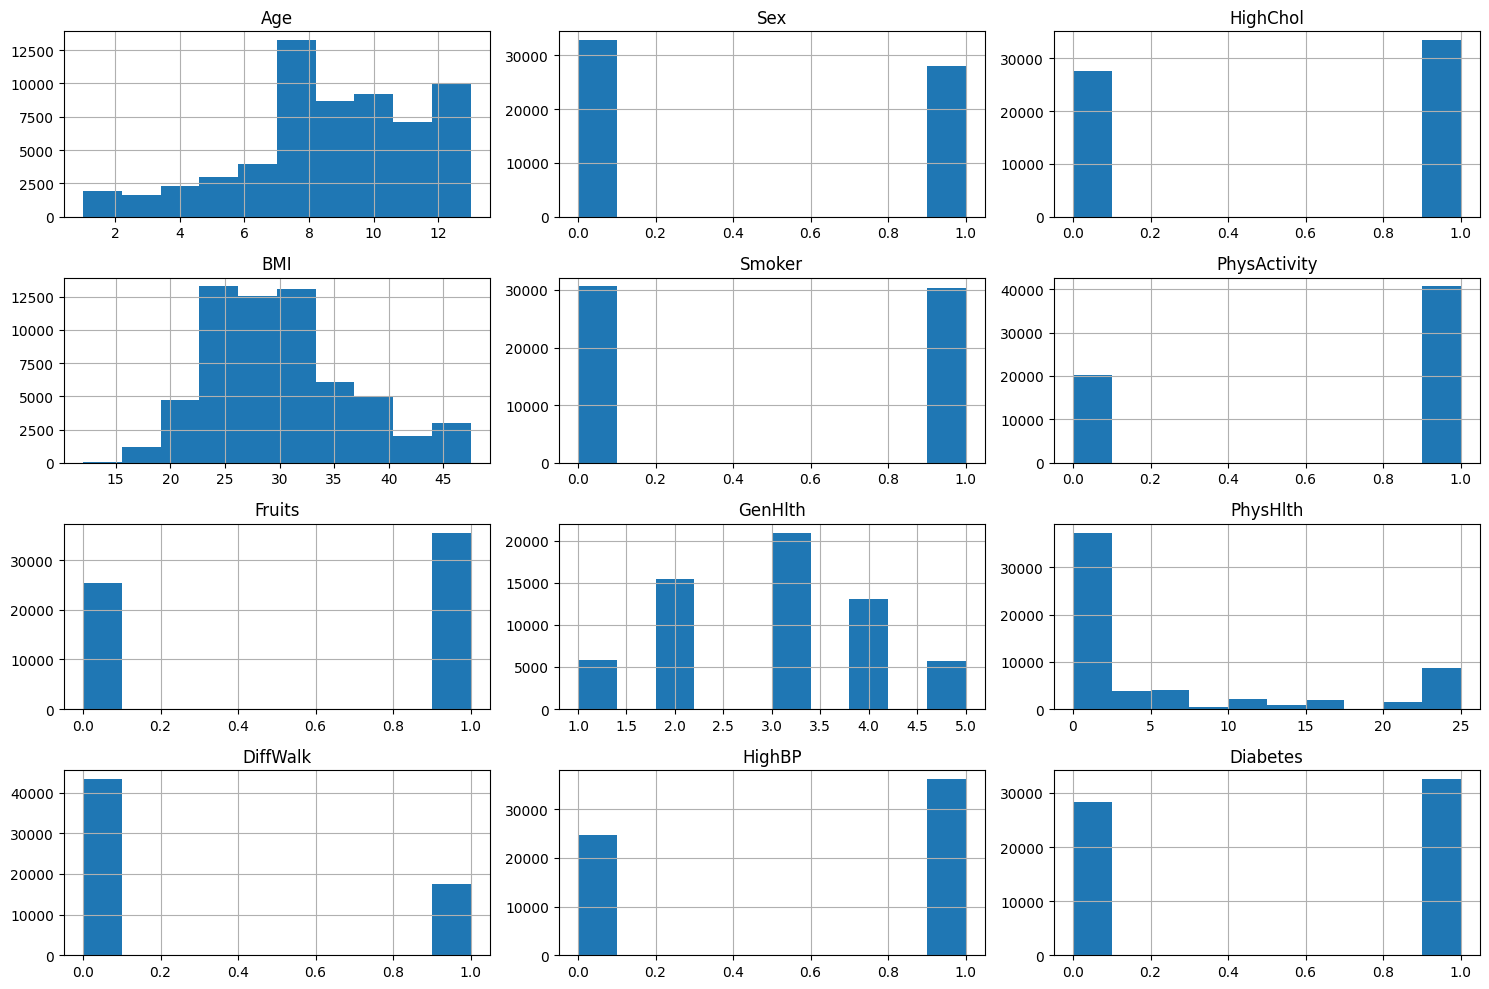

In [245]:
# Histograms for numerical columns after outlier treatment
df1[numeric_columns].hist( figsize=(15, 10),)
plt.tight_layout()
plt.show()

In [246]:
#target variable analysis
df1["Diabetes"].value_counts()

Diabetes
1.0    32604
0.0    28327
Name: count, dtype: int64

<Axes: xlabel='Diabetes', ylabel='count'>

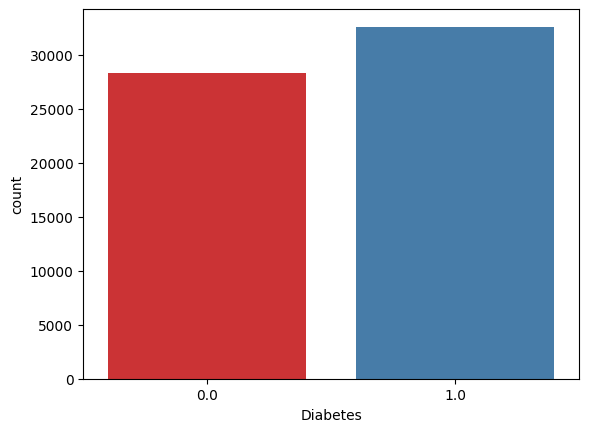

In [247]:
sns.countplot(data= df1, x="Diabetes",palette="Set1")

In [248]:
#target variable analysis
df1["HighChol"].value_counts()

HighChol
1.0    33436
0.0    27495
Name: count, dtype: int64

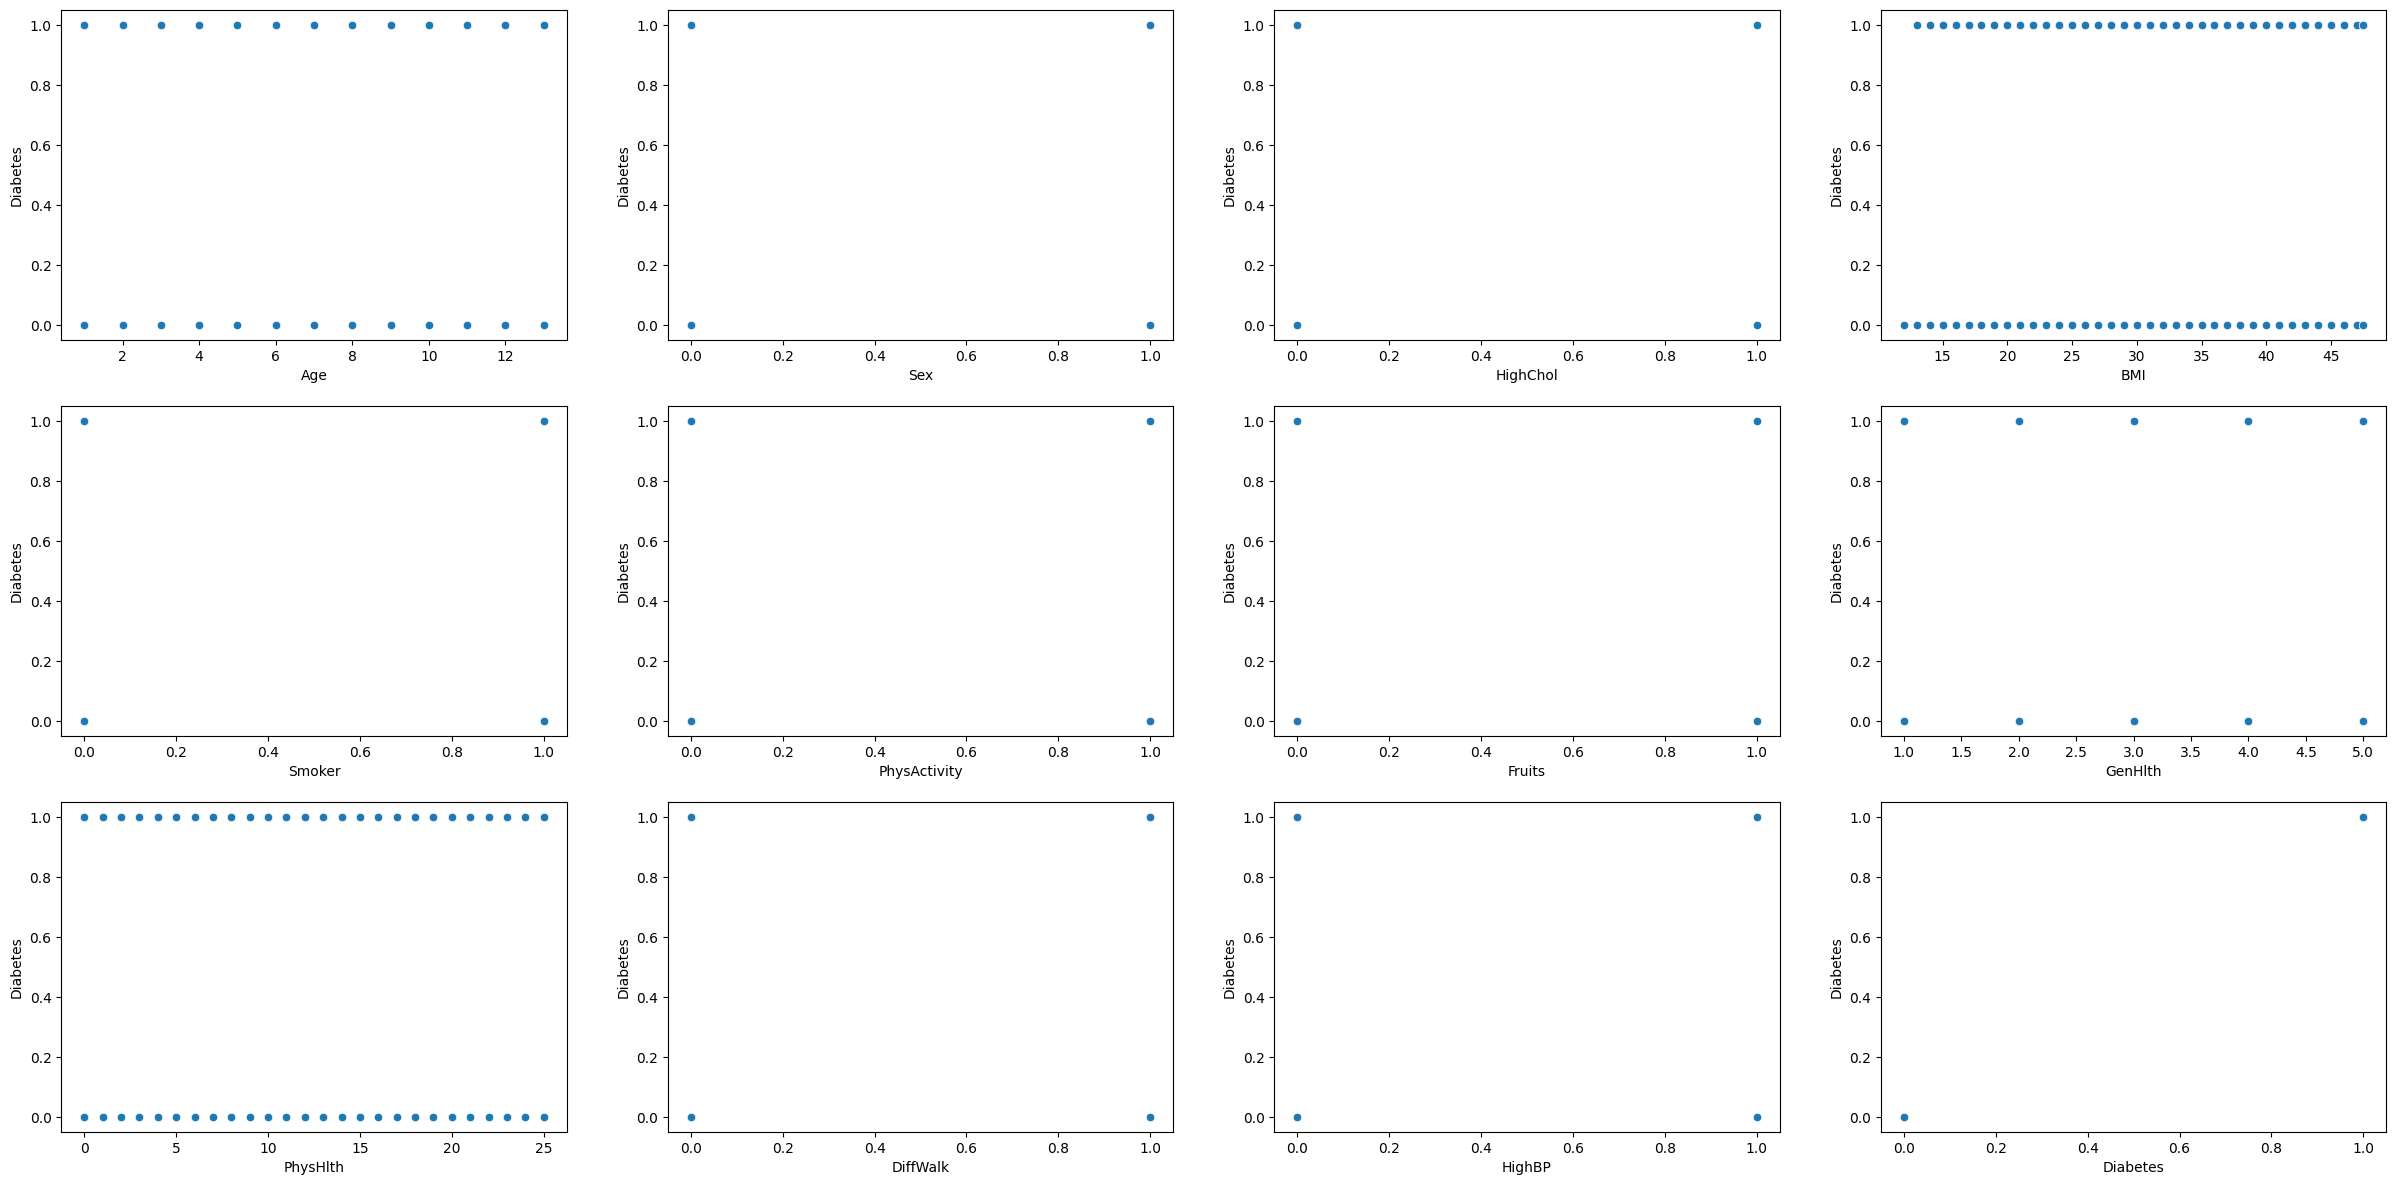

In [249]:
# scatter plot to visualize relationship between target variable ('Diabetes') & numerical variables
fig = plt.figure(figsize=(30,30))
counter = 0

for col in numeric_columns:
    fig.add_subplot(6,4,counter+1)
    sns.scatterplot(data=df1,x=col,y='Diabetes')
    plt.xlabel(col)
    counter = counter + 1

<function matplotlib.pyplot.show(close=None, block=None)>

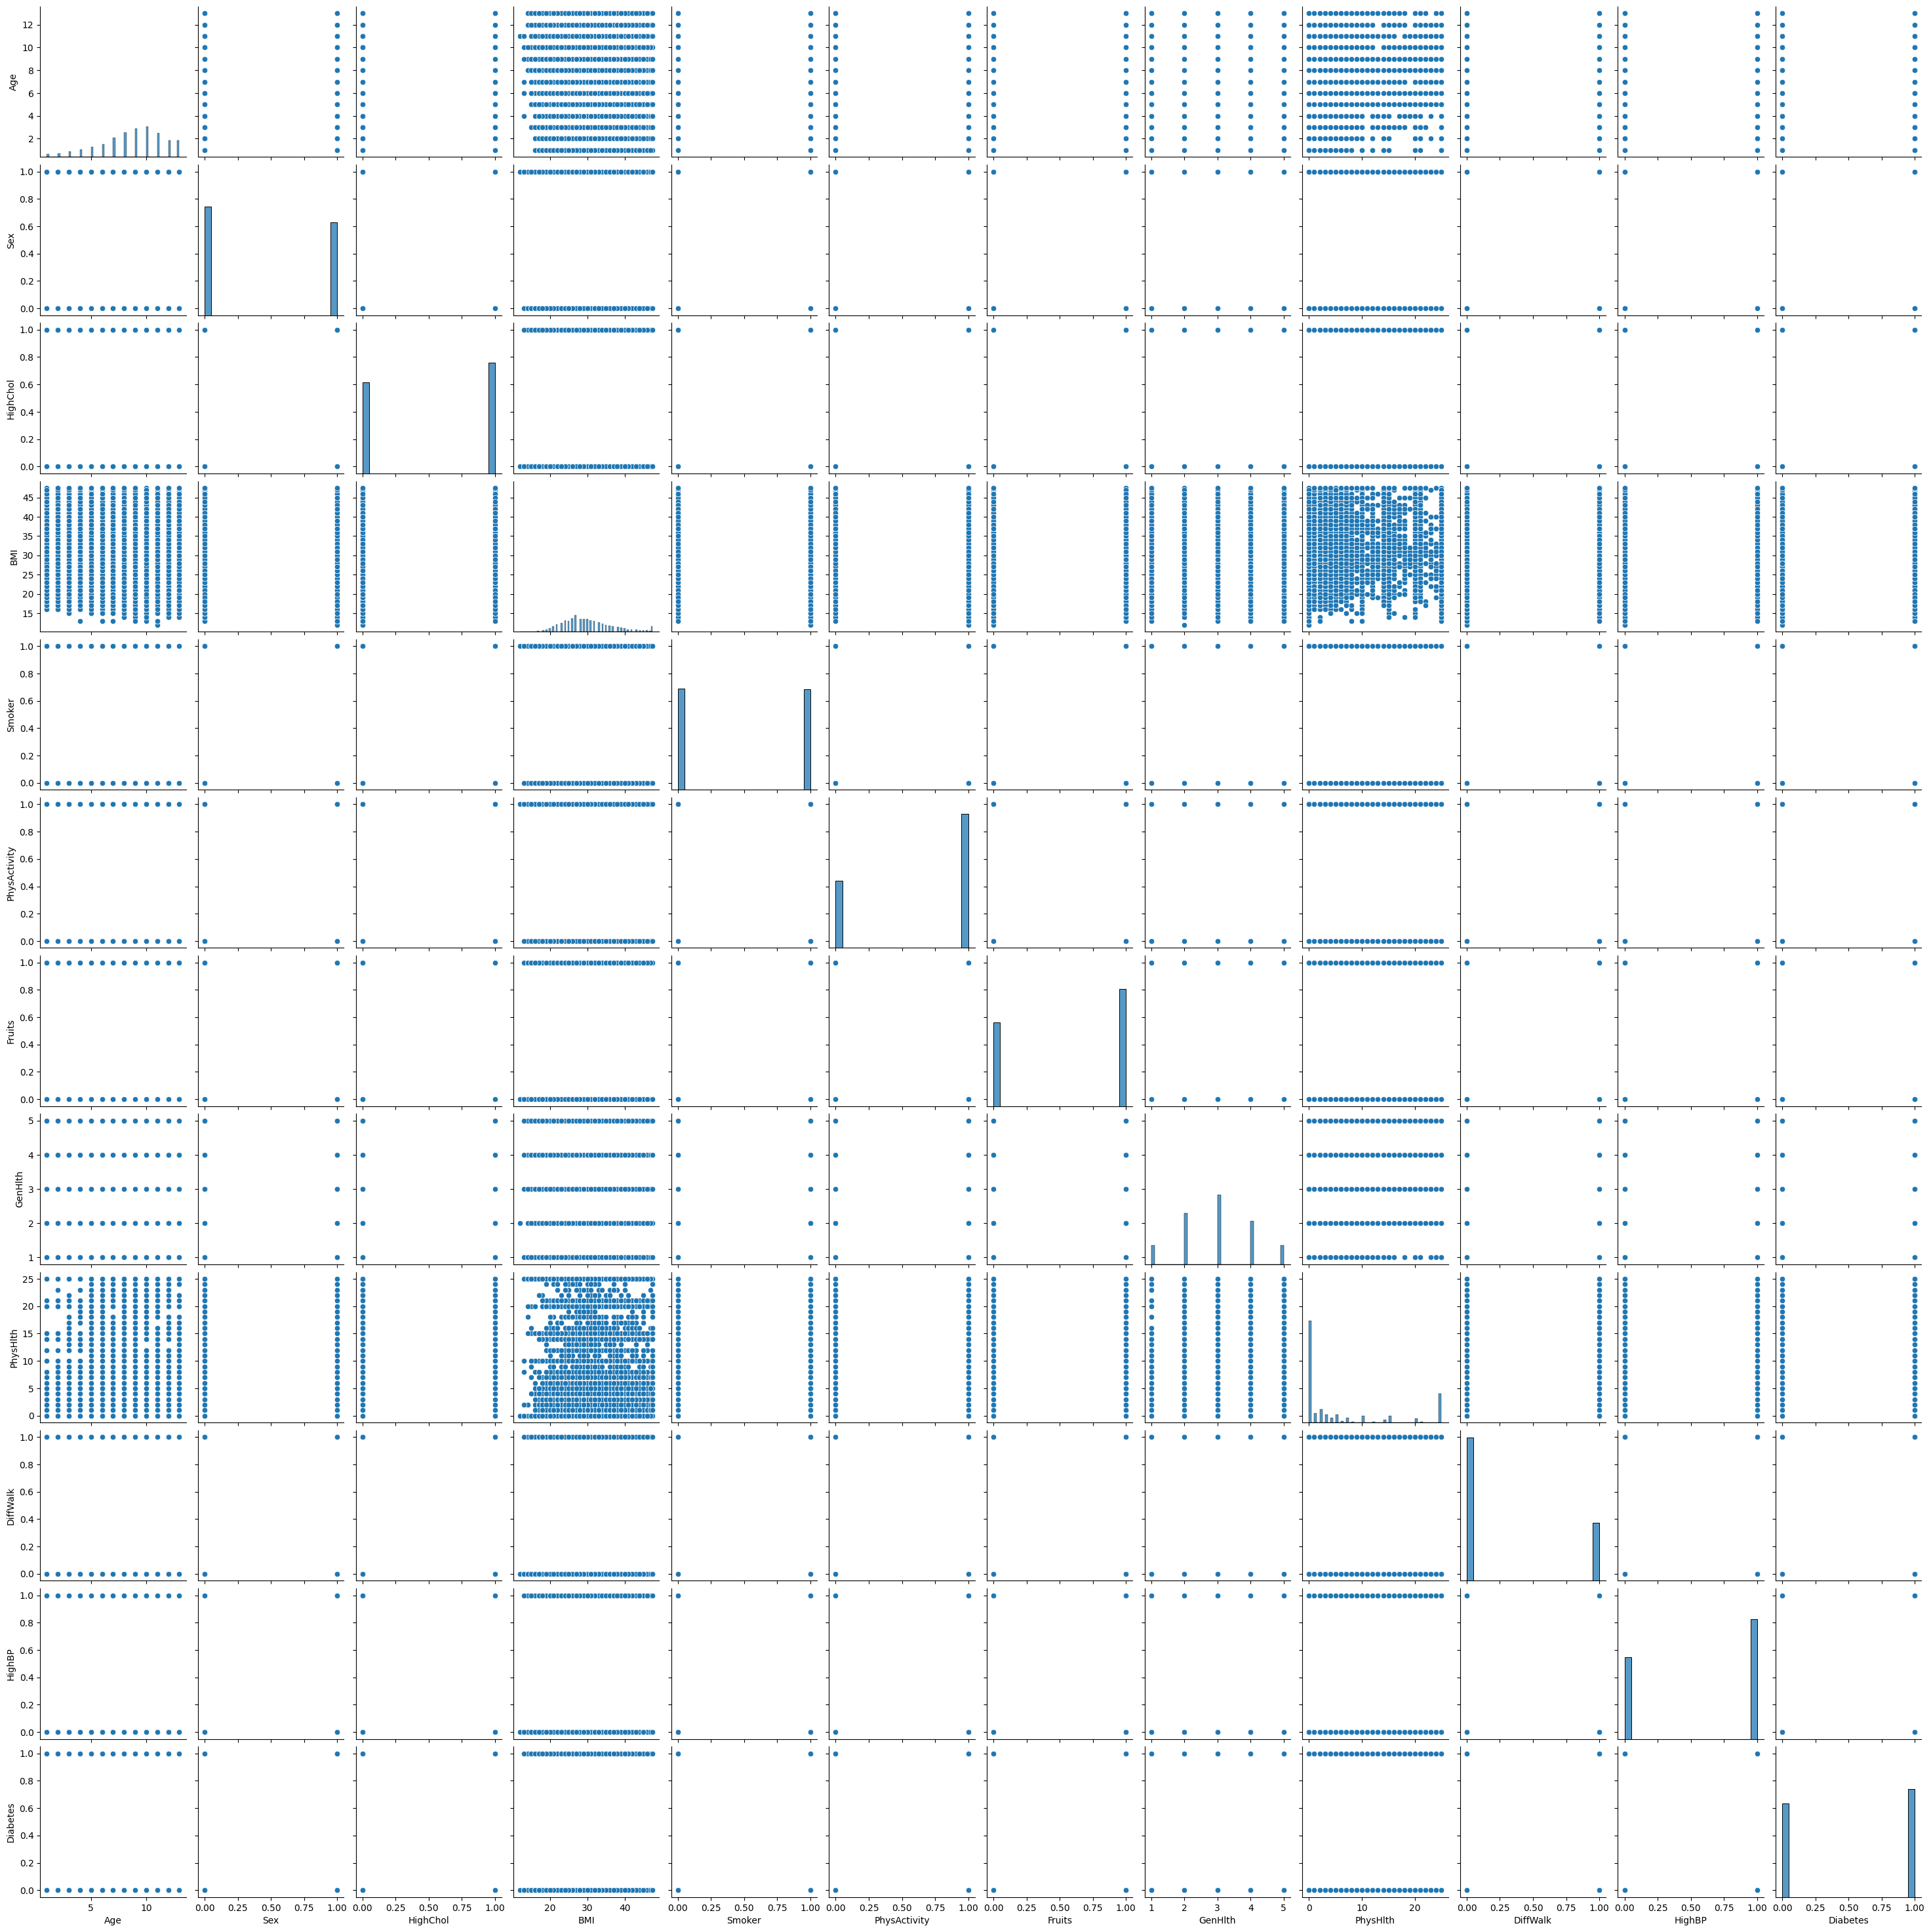

In [250]:
#Pair plot - To visualize relationships between multiple pairs of variables.
sns.pairplot(df1)
plt.show

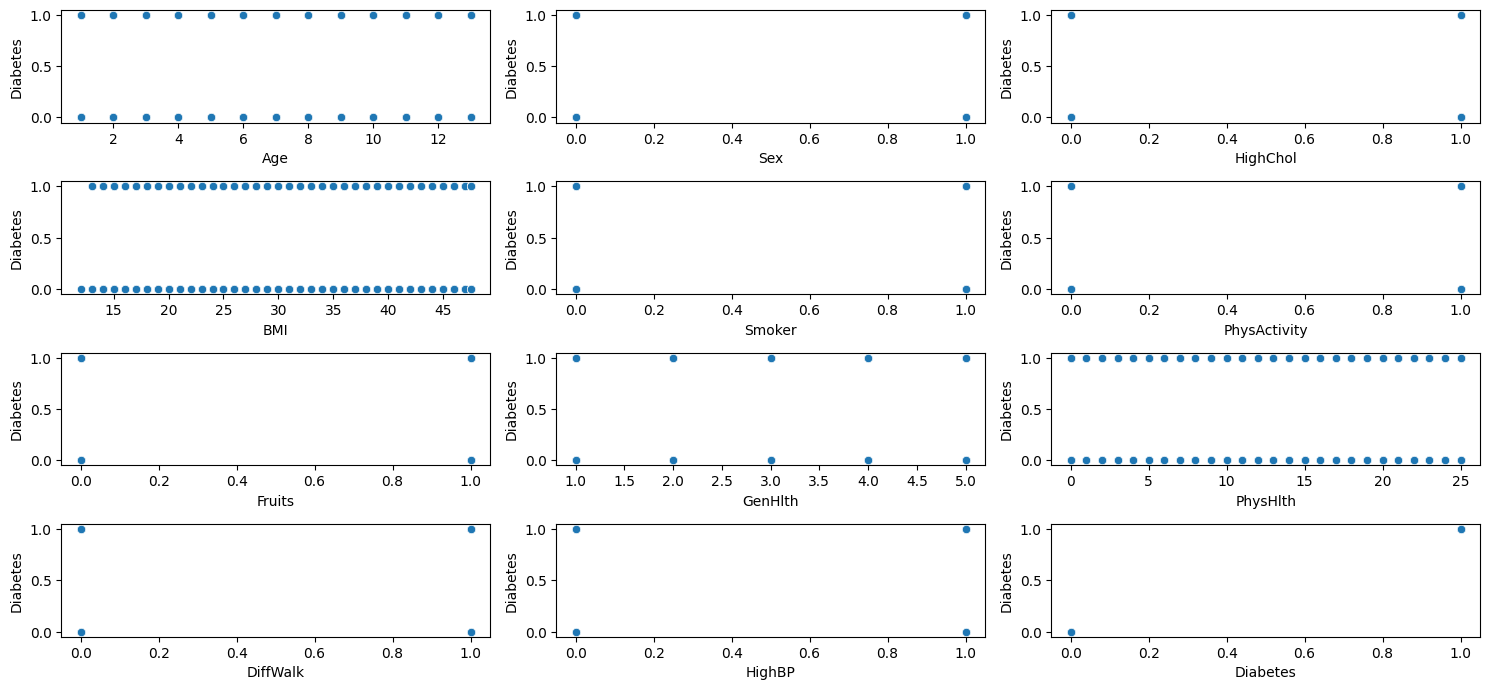

In [251]:
# scatter plot to identify the relationship between dependent (Diabetes) and independent features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
 plt.subplot(6, 3, i+1)
 sns.scatterplot(data=df1,x=col,y='Diabetes')
 plt.xlabel(col)
plt.tight_layout()
plt.show()

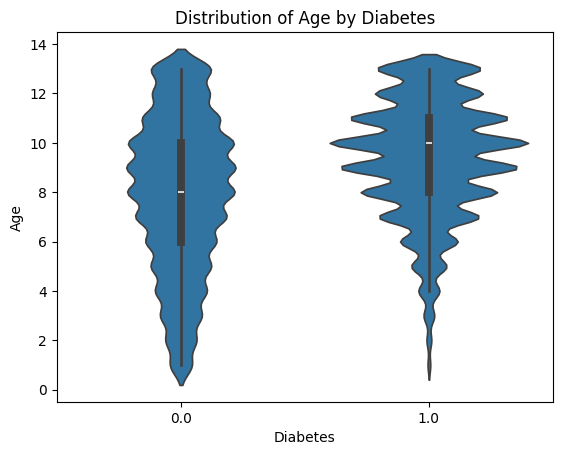

In [252]:
# violinplot - Visualize the distribution of Age by Diabetes.
sns.violinplot(data=df1, x='Diabetes', y='Age')
plt.title('Distribution of Age by Diabetes')
plt.show()

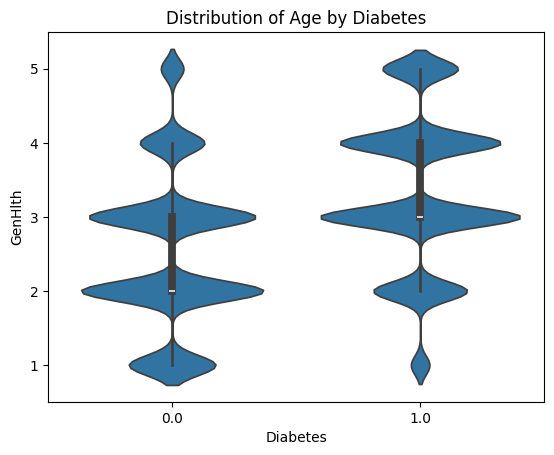

In [287]:
# violinplot - Visualize the distribution of Age by Diabetes.
sns.violinplot(data=df1, x='Diabetes', y='GenHlth')
plt.title('Distribution of Age by Diabetes')
plt.show()

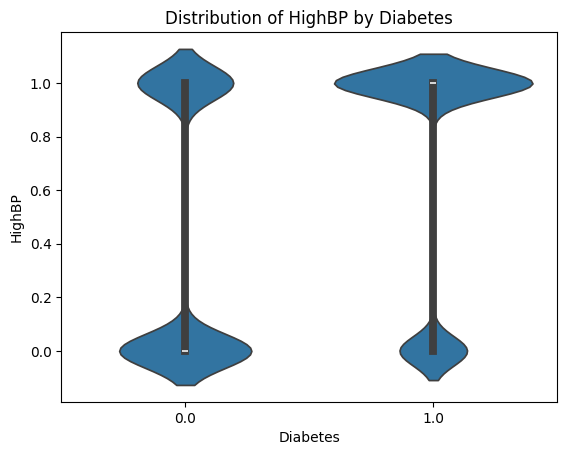

In [290]:
# violinplot - Visualize the distribution of Age by Diabetes.
sns.violinplot(data=df1, x='Diabetes', y='HighBP')
plt.title('Distribution of HighBP by Diabetes')
plt.show()

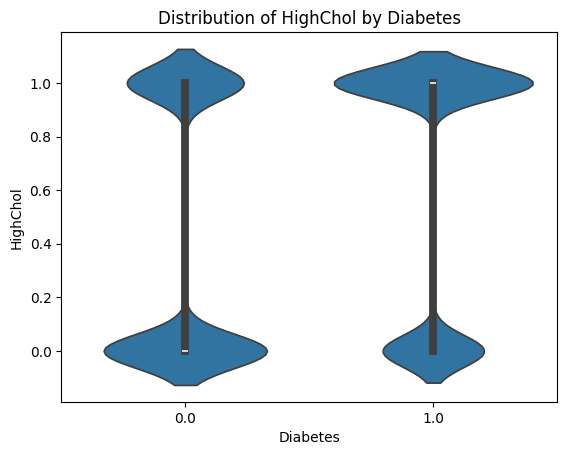

In [291]:
# violinplot - Visualize the distribution of Age by Diabetes.
sns.violinplot(data=df1, x='Diabetes', y='HighChol')
plt.title('Distribution of HighChol by Diabetes')
plt.show()

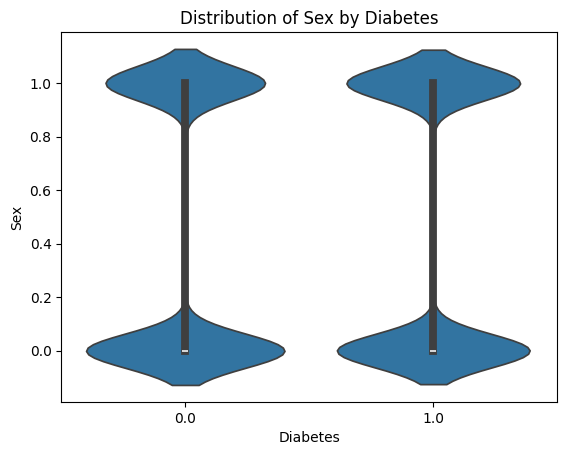

In [292]:
# violinplot - Visualize the distribution of Age by Diabetes.
sns.violinplot(data=df1, x='Diabetes', y='Sex')
plt.title('Distribution of Sex by Diabetes')
plt.show()

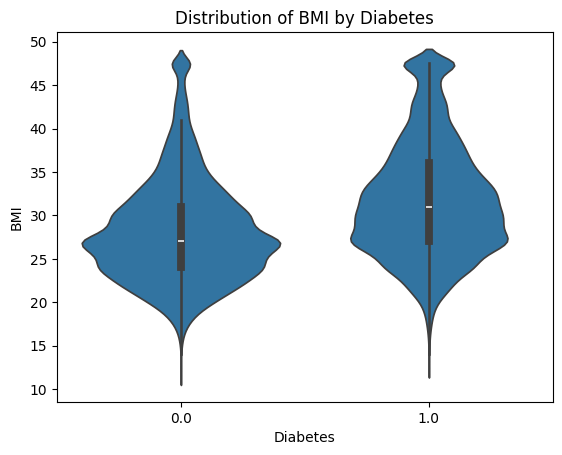

In [293]:
# violinplot - Visualize the distribution of Age by Diabetes.
sns.violinplot(data=df1, x='Diabetes', y='BMI')
plt.title('Distribution of BMI by Diabetes')
plt.show()

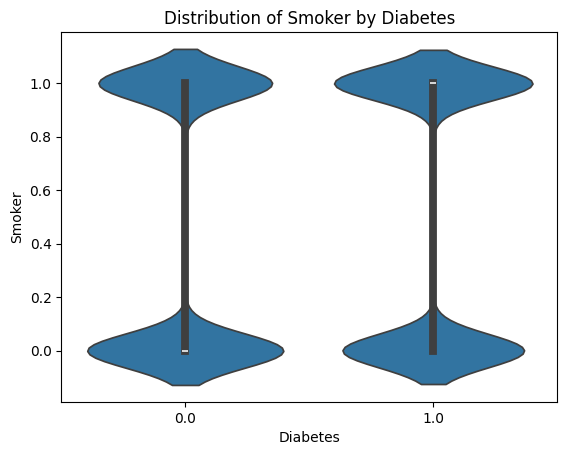

In [294]:
# violinplot - Visualize the distribution of Age by Diabetes.
sns.violinplot(data=df1, x='Diabetes', y='Smoker')
plt.title('Distribution of Smoker by Diabetes')
plt.show()

<Axes: >

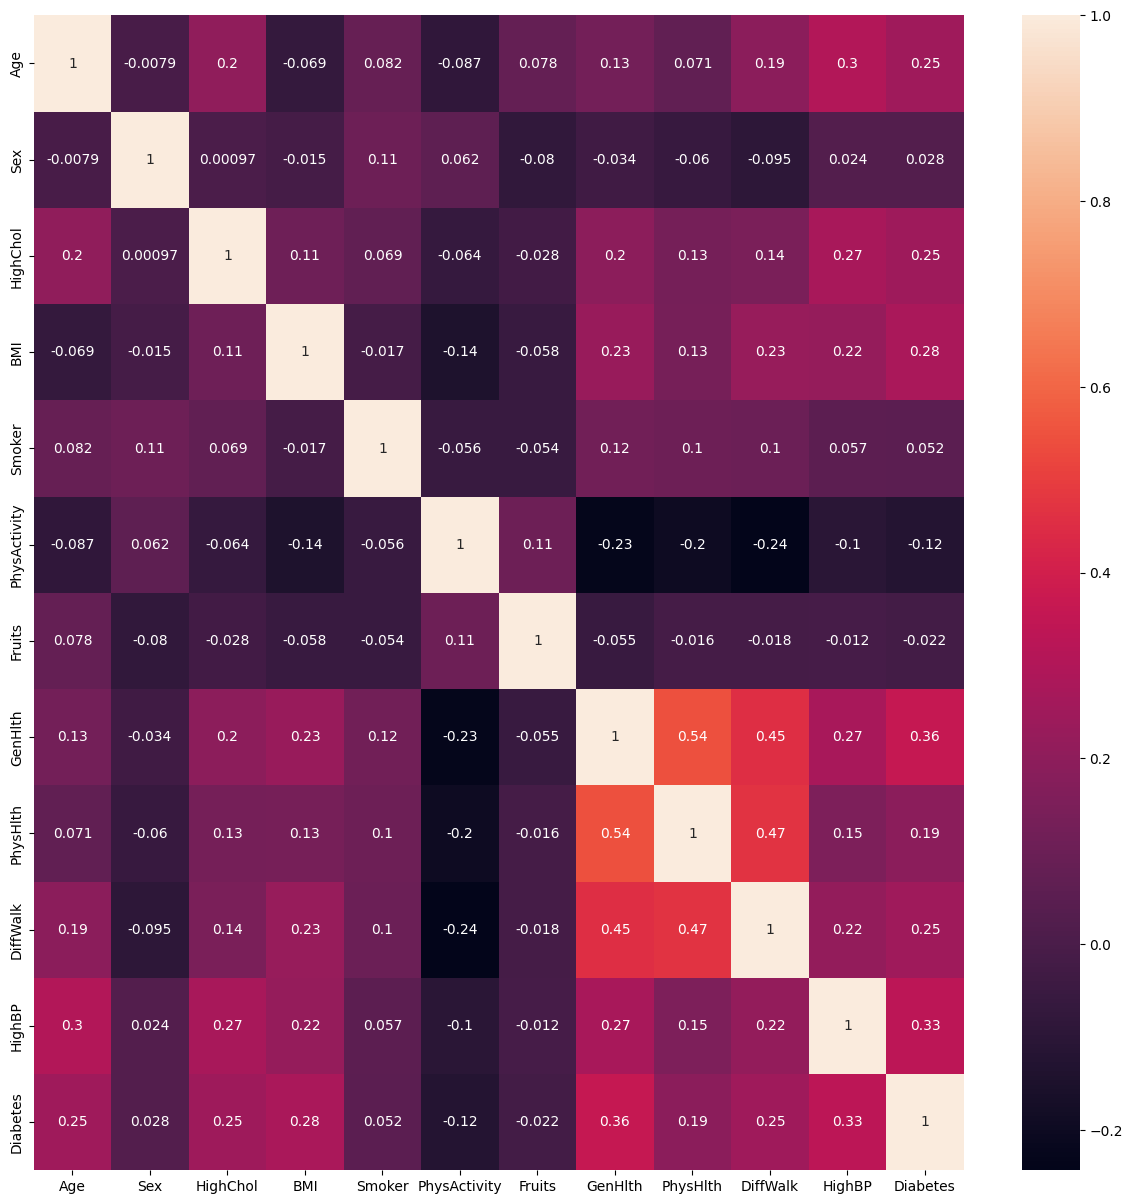

In [253]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df1[numeric_columns].corr(),annot=True)

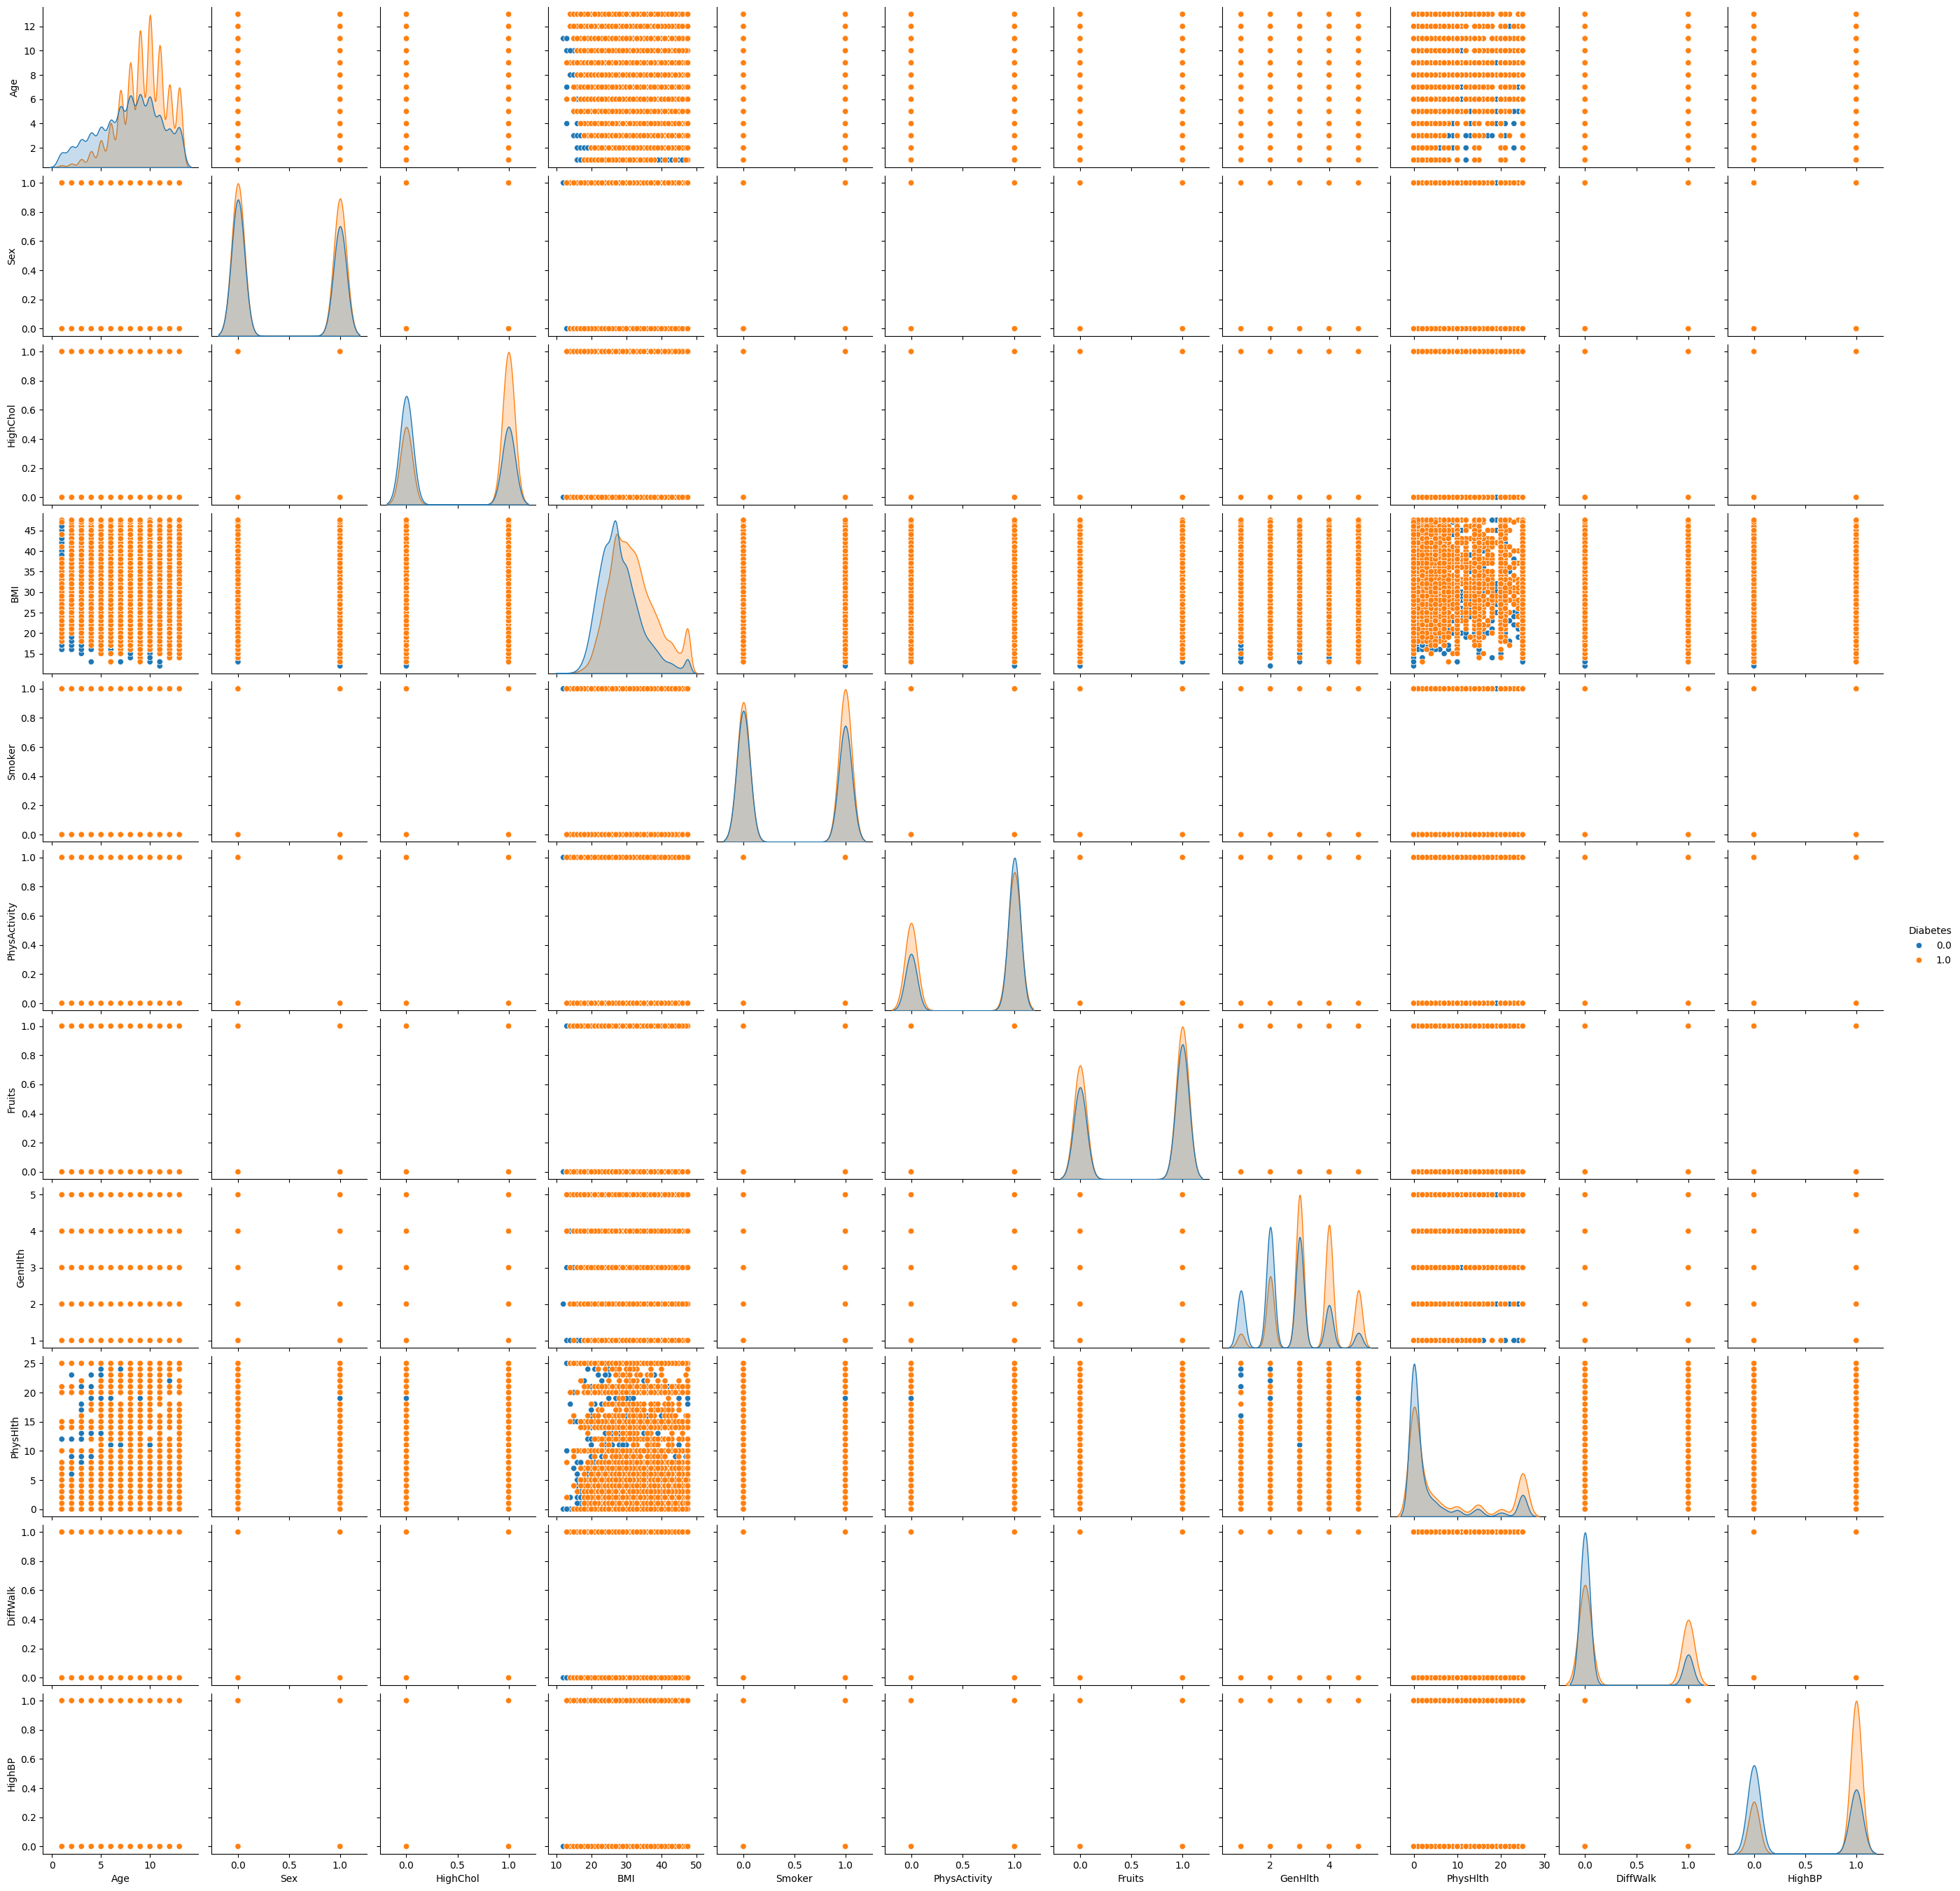

In [254]:
# pair plot
p= sns.pairplot(df1, hue = "Diabetes")

## <font color='Red'> 8. Feature Engineering

In [255]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60931 entries, 0 to 70691
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           60931 non-null  float64
 1   Sex           60931 non-null  float64
 2   HighChol      60931 non-null  float64
 3   BMI           60931 non-null  float64
 4   Smoker        60931 non-null  float64
 5   PhysActivity  60931 non-null  float64
 6   Fruits        60931 non-null  float64
 7   GenHlth       60931 non-null  float64
 8   PhysHlth      60931 non-null  float64
 9   DiffWalk      60931 non-null  float64
 10  HighBP        60931 non-null  float64
 11  Diabetes      60931 non-null  float64
dtypes: float64(12)
memory usage: 6.0 MB


In [256]:
df1.shape

(60931, 12)

In [257]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60931.0,8.674468,2.841153,1.0,7.0,9.0,11.0,13.0
Sex,60931.0,0.460800,0.498465,0.0,0.0,0.0,1.0,1.0
HighChol,60931.0,0.548752,0.497622,0.0,0.0,1.0,1.0,1.0
BMI,60931.0,30.144188,6.588908,12.0,25.0,29.0,34.0,47.5
Smoker,60931.0,0.497694,0.499999,0.0,0.0,0.0,1.0,1.0
PhysActivity,60931.0,0.667099,0.471255,0.0,0.0,1.0,1.0,1.0
Fruits,60931.0,0.583004,0.493066,0.0,0.0,1.0,1.0,1.0
GenHlth,60931.0,2.958100,1.104428,1.0,2.0,3.0,4.0,5.0
PhysHlth,60931.0,5.978714,9.056684,0.0,0.0,0.0,10.0,25.0
DiffWalk,60931.0,0.288490,0.453064,0.0,0.0,0.0,1.0,1.0


In [258]:
X=df1.drop('Diabetes',axis=1)
y=df1[['Diabetes']]

In [259]:
X.head()

,Age,Sex,HighChol,BMI,Smoker,PhysActivity,Fruits,GenHlth,PhysHlth,DiffWalk,HighBP
0,4.0,1.0,0.0,26.0,0.0,1.0,0.0,3.0,25.0,0.0,1.0
1,12.0,1.0,1.0,26.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0
2,13.0,1.0,0.0,26.0,0.0,1.0,1.0,1.0,10.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0
4,8.0,0.0,0.0,29.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0


In [260]:
X.shape

(60931, 11)

In [261]:
y.shape

(60931, 1)

### Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training

In [262]:
# Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Convert the result back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Age,Sex,HighChol,BMI,Smoker,PhysActivity,Fruits,GenHlth,PhysHlth,DiffWalk,HighBP
0,-1.645285,1.081730,-1.102758,-0.628969,-0.995399,0.706419,-1.182414,0.037938,2.100266,-0.636759,0.825505
1,1.170496,1.081730,0.906817,-0.628969,1.004622,-1.415590,0.845727,0.037938,-0.660149,-0.636759,0.825505
2,1.522469,1.081730,-1.102758,-0.628969,-0.995399,0.706419,0.845727,-1.772969,0.444017,-0.636759,-1.211380
3,0.818524,1.081730,0.906817,-0.325426,1.004622,0.706419,0.845727,0.037938,-0.328899,-0.636759,0.825505
4,-0.237394,-0.924445,-1.102758,-0.173655,1.004622,0.706419,0.845727,-0.867515,-0.660149,-0.636759,-1.211380
...,...,...,...,...,...,...,...,...,...,...,...
60926,-0.941340,-0.924445,0.906817,1.040517,-0.995399,-1.415590,-1.182414,0.943392,-0.660149,-0.636759,-1.211380
60927,0.466551,1.081730,0.906817,-0.173655,1.004622,-1.415590,0.845727,-0.867515,-0.660149,1.570453,-1.211380
60928,1.522469,-0.924445,0.906817,-0.780741,-0.995399,-1.415590,0.845727,1.848846,-0.660149,1.570453,0.825505
60929,0.818524,-0.924445,0.906817,-1.843141,-0.995399,-1.415590,-1.182414,0.943392,-0.660149,1.570453,0.825505


## <font color='Red'> 9. Data Splitting

In [263]:
#Splitting the dataset into 80-20, that is, 80% of the data is for training and 20% of the data is for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## <font color='Red'> 10. Selection

#### Models Selected: 
* LinearRegression 
* DecisionTreeRegressor 
* ExtraTreeRegressor 
* RandomForestRegressor 
* GradientBoostingRegressor 

## <font color='Red'> 11. Model Training & Evaluation

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []

models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 ExtraTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
]

for model in models :
 model.fit(X_train , y_train)

 prediction = model.predict(X_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y_test, prediction, squared=False))
 MSE.append(mean_squared_error(y_test, prediction))
 MAE.append(mean_absolute_error(y_test, prediction))
 R2_score.append(r2_score(y_test, prediction) * 100)


In [265]:
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)


,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,0.422865,0.178815,0.360511,27.964398
LinearRegression,0.427154,0.182461,0.370977,26.495814
RandomForestRegressor,0.476140,0.226710,0.382807,8.670125
ExtraTreeRegressor,0.605102,0.366148,0.386383,-47.502741
DecisionTreeRegressor,0.606208,0.367488,0.387402,-48.042623


1. GradientBoostingRegressor:
Best Performance: This model shows the lowest error metrics (RMSE, MSE, MAE) and the highest R² score, indicating that it captures the data's variability more effectively than the others.

2. LinearRegression:
Good Performance: Linear regression also performs well but slightly worse than Gradient Boosting. The model likely assumes a linear relationship, which may not fully capture the complexity of the data.

3. RandomForestRegressor:
Moderate Performance: Random Forest has higher error metrics and a lower R² score compared to the first two models. This suggests that it might not be capturing the data's patterns as effectively, possibly due to overfitting or insufficient depth of the trees.

4. ExtraTreeRegressor:
Poor Performance: This model has significantly higher error metrics and a notably negative R² score. A negative R² indicates that the model is worse than a mean-based baseline, suggesting overfitting or poor generalization.

5. DecisionTreeRegressor:
Poor Performance: Similar to Extra Trees, this model shows poor performance with high error metrics and a negative R² score, indicating that it doesn't generalize well and may be overfitting the training data.

## <font color='Red'> 12. Feature Selection And 13. Model Evaluation

### 1. SelecKBbest

In [266]:
from sklearn.feature_selection import SelectKBest, f_regression
# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=10)
X_kbest = selector_kbest.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)
# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]
print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['Age', 'Sex', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'HighBP'],
      dtype='object')


### Train the models with selected features using SelectKBest

In [267]:
X1 = X_scaled[['Age', 'Sex', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'HighBP']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 ExtraTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
]
for model in models :
 model.fit(X1_train , y1_train)

 prediction = model.predict(X1_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y1_test, prediction, squared=False))
 MSE.append(mean_squared_error(y1_test, prediction))
 MAE.append(mean_absolute_error(y1_test, prediction))
 R2_score.append(r2_score(y1_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,0.422862,0.178812,0.360526,27.965570
LinearRegression,0.427157,0.182463,0.370979,26.494816
RandomForestRegressor,0.473914,0.224594,0.375185,9.522216
ExtraTreeRegressor,0.583275,0.340209,0.375834,-37.053157
DecisionTreeRegressor,0.585326,0.342607,0.378169,-38.019055


1. **Lowest RMSE (Root Mean Square Error)**:
   
An RMSE of **0.422862** indicates that the model's predictions are, on average, closer to the actual values compared to other models. A lower RMSE is generally preferred as it suggests higher accuracy.

3. **Lowest MSE (Mean Square Error)**:
   
The MSE of **0.178812** is the lowest among the models. MSE penalizes larger errors more than smaller ones due to squaring the differences, making it a sensitive measure. The lower the MSE, the better the model's predictive accuracy.

5. **Lowest MAE (Mean Absolute Error)**:
   
With an MAE of **0.360526**, the GradientBoostingRegressor has the smallest average absolute difference between predicted and actual values. MAE is a straightforward measure of error, providing a clear view of average prediction error.

7. **Highest R² Score**:
   
The R² score of **27.965570** is significantly higher than that of the other models. R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² indicates better model performance in explaining the variability of the target variable.

The combination of low errors and high R² score makes the GradientBoostingRegressor the best-performing model in this case, indicating it has the most accurate and reliable predictions among the evaluated models.

### 2. SelectFromModel with Lasso (L1 Regularization)

In [268]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Lasso model
lasso_model = Lasso(alpha=0.1) # Adjust alpha as needed
# SelectFromModel with Lasso
selector_lasso = SelectFromModel(lasso_model, max_features=10)
X_lasso = selector_lasso.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)
# Print selected feature names
selected_features_lasso = X_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)


Selected features using SelectFromModel with Lasso: Index(['Age', 'BMI', 'GenHlth', 'HighBP'], dtype='object')


### Train the models with selected features using L1 Regularization

In [269]:
X2 = X_scaled[['Age', 'BMI', 'GenHlth', 'HighBP']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 ExtraTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
]
for model in models :
 model.fit(X2_train , y2_train)

 prediction = model.predict(X2_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y2_test, prediction, squared=False))
 MSE.append(mean_squared_error(y2_test, prediction))
 MAE.append(mean_absolute_error(y2_test, prediction))
 R2_score.append(r2_score(y2_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,0.427193,0.182494,0.366901,26.482408
LinearRegression,0.431188,0.185923,0.377119,25.101010
RandomForestRegressor,0.441969,0.195336,0.368174,21.308841
ExtraTreeRegressor,0.446050,0.198961,0.368488,19.848676
DecisionTreeRegressor,0.446166,0.199065,0.368478,19.806921


SelectFromModel with Lasso identified key features including Age, BMI, GenHlth, HighBP .
Here still GradientBoostingRegressor performs the best 
1. **Lowest RMSE (0.427193)**
   
2. **Lowest MSE (0.182494)**
   
3. **Low MAE(0.366901)**
   
4. **Highest R² Score (26.482408)**

with these values it has the best model also **LinearRegression** also close  

### 3. Recursive Feature Elimination (RFE) with Random Forest Regressor

In [270]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
# Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# RFE with Random Forest regressor
rfe_selector_regressor = RFE(estimator=rf_regressor, n_features_to_select=10, step=1)
X_rfe_regressor = rfe_selector_regressor.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices_rfe_regressor = rfe_selector_regressor.get_support(indices=True)
# Get the names of the selected features
selected_features_rfe_regressor = X_train.columns[selected_indices_rfe_regressor]
print("Selected features using RFE with Random Forest Regressor:", selected_features_rfe_regressor)

Selected features using RFE with Random Forest Regressor: Index(['Age', 'Sex', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'HighBP'],
      dtype='object')


In [271]:
X3 = X_scaled[['Age', 'Sex', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'HighBP']]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 ExtraTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
]
for model in models :
 model.fit(X3_train , y3_train)

 prediction = model.predict(X3_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y3_test, prediction, squared=False))
 MSE.append(mean_squared_error(y3_test, prediction))
 MAE.append(mean_absolute_error(y3_test, prediction))
 R2_score.append(r2_score(y3_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)


,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,0.426158,0.181611,0.365672,26.838066
LinearRegression,0.430508,0.185337,0.375786,25.337057
RandomForestRegressor,0.479711,0.230123,0.384420,7.295180
DecisionTreeRegressor,0.589174,0.347126,0.382863,-39.839458
ExtraTreeRegressor,0.589479,0.347486,0.383378,-39.984508


RFE selected with key features Age, Sex, BMI, Smoker, PhysActivity, Fruits', GenHlth,'PhysHlt','DiffWal','HighB
Here still GradientBoostingRegressor performs the best
1. **Lowest RMSE (0.426158)**
   
2. **Lowest MSE (0.181611)**
   
3. **Low MAE(0.365672)**
   
4. **Highest R² Score (26.838066)**
   
Performance: Best overall performance with the lowest RMSE, MSE, and MAE, and the highest R² score among the models, indicating strong predictive accuracy.and near close with LinearRegression'

### 4. Feature selection using Variance Threshold

In [272]:
from sklearn.feature_selection import VarianceThreshold
# Variance Threshold
variance_selector = VarianceThreshold(threshold=0.1) # Adjust threshold as needed
X_variance = variance_selector.fit_transform(X_train)
# Get the selected feature indices
selected_indices_variance = [i for i, keep in enumerate(variance_selector.get_support()) if keep]
# Print selected feature names
selected_features_variance = X_train.iloc[:, selected_indices_variance].columns.tolist()
print("Selected features using Variance Threshold:", selected_features_variance)

Selected features using Variance Threshold: ['Age', 'Sex', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'GenHlth', 'PhysHlth', 'DiffWalk', 'HighBP']


### Train the models with selected features using Variance Threshold

In [273]:
X4 = X_scaled[['Age', 'Sex', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'GenHlth', 'PhysHlth', 'DiffWalk', 'HighBP']]

X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 ExtraTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
]
for model in models :
 model.fit(X4_train , y4_train)

 prediction = model.predict(X4_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y4_test, prediction, squared=False))
 MSE.append(mean_squared_error(y4_test, prediction))
 MAE.append(mean_absolute_error(y4_test, prediction))
 R2_score.append(r2_score(y4_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)


,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,0.422865,0.178815,0.360511,27.964398
LinearRegression,0.427154,0.182461,0.370977,26.495814
RandomForestRegressor,0.475469,0.226071,0.382116,8.927311
ExtraTreeRegressor,0.602012,0.362418,0.382118,-46.000112
DecisionTreeRegressor,0.605697,0.366869,0.386985,-47.793098


Variance Threshold selected the features Age, Sex, HighChol, BMI, Smoker, PhysActivity, Fruits, GenHlth, PhysHlth, DiffWalk, HighBP
Here still GradientBoostingRegressor performs the best,and the LinearRegression came close


1. **Lowest RMSE (0.426158)**
   
2. **Lowest MSE (0.181611)**
   
3. **Low MAE(0.365672)**
   
4. **Highest R² Score (26.838066)**

### GradientBoostingRegressor Feature Importance Analysis

Top 10 Important Features:
     Feature  Importance
10    HighBP    0.311147
7    GenHlth    0.302441
3        BMI    0.147130
0        Age    0.130815
2   HighChol    0.066042
9   DiffWalk    0.028079
1        Sex    0.008627
8   PhysHlth    0.003586
4     Smoker    0.000855
6     Fruits    0.000769


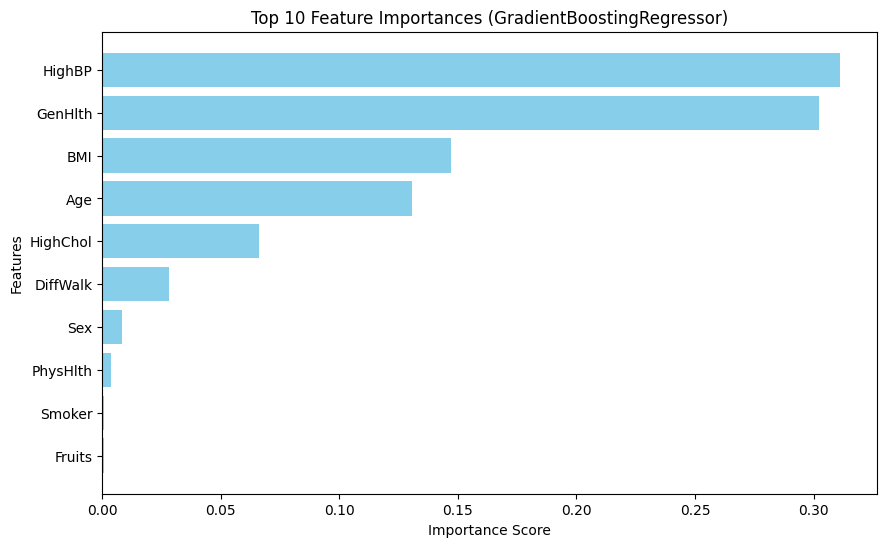

In [275]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on your training data
gb_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = gb_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
top_features = feature_importance_df.head(10)
print("Top 10 Important Features:")
print(top_features)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue', align='center')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances (GradientBoostingRegressor)')
plt.gca().invert_yaxis()
plt.show()

**HighBP (High Blood Pressure)**: 0.311147 (31.11%)
The most significant feature in predicting the target variable, contributing 31.11% of the model's importance.

**GenHlth (General Health)**: 0.302441 (30.24%)
Almost as important as HighBP, with a contribution of 30.24% to the model's predictive power.

**BMI (Body Mass Index)**: 0.147130 (14.71%)
Important but less so than HighBP and GenHlth, accounting for 14.71% of the total importance.

**Age**: 0.130815 (13.08%)
A significant feature, contributing 13.08% to the overall importance.

**HighChol (High Cholesterol)**: 0.066042 (6.60%)
Moderately important, contributing 6.60% to the model's importance.
 
**DiffWalk (Difficulty Walking)**: 0.028079 (2.81%)
A less influential feature, with a contribution of 2.81% to the model's importance.
 
**Sex**: 0.008627 (0.86%)
A minor feature, contributing just 0.86% to the total importance.
 
**PhysHlth (Physical Health)**: 0.003586 (0.36%)
Very low importance, making up only 0.36% of the model’s importance.
 
**Smoker**: 0.000855 (0.09%)
Nearly negligible, contributing just 0.09% to the overall importance.
 
**Fruits**: 0.000769 (0.08%)
The least important feature, with only 0.08% contribution to the model’s importance.

#### Summary

HighBP and GenHlth are the most important features, together accounting for over 60% of the model's importance.

Features like BMI and Age also have significant roles but are less important compared to HighBP and GenHlth.

Sex, PhysHlth, Smoker, and Fruits contribute very little, with their importance percentages being quite low.

## <font color='Red'> 14. Hyperparameter Tuning

In [276]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Define parameter grid for Gradient Boosting Regressor
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search_gb = GridSearchCV(
    estimator=gb_model, 
    param_grid=param_grid_gb, 
    scoring='neg_mean_squared_error', 
    cv=3, 
    n_jobs=-1, 
    verbose=2
)

grid_search_gb.fit(X_train, y_train)

# Get the best model from grid search
best_gb_model = grid_search_gb.best_estimator_

# Predict on test data
y_pred = best_gb_model.predict(X_test)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) * 100

# Print the results
print("Best Parameters:", grid_search_gb.best_params_)
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    "Model-Name": ["GradientBoostingRegressor"],
    "RMSE": [rmse],
    "MSE": [mse],
    "MAE": [mae],
    "R2 Score": [r2]
})

results_df.set_index('Model-Name', inplace=True)
print(results_df)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
RMSE: 0.42250219788456184
MSE: 0.17850810721728547
MAE: 0.3596771567331352
R2 Score: 28.088064906647002
                               RMSE       MSE       MAE   R2 Score
Model-Name                                                        
GradientBoostingRegressor  0.422502  0.178508  0.359677  28.088065


## <font color='Red'> 15. Results

#### The GradientBoostingRegressor demonstrates good prediction accuracy with low RMSE, MSE, and MAE values. 
The R2 Score of **28.09%** indicates that the model explains about **28%** of the variance in the target variable, suggesting a moderate level of explanatory power. 

## <font color='Red'> 16. Model Deployment

## Save the Model

### Save Trained Model Using joblib

In [296]:
import joblib
import os

# Saving the Gradient Boosting Model using joblib
best_model = best_gb_model  # Use the best GradientBoostingRegressor instance
filename = 'gradient_boosting_regressor_model.joblib'

# Save the model to a file
joblib.dump(best_model, filename)
print("Model saved successfully.")

# Check if the model file exists
if os.path.isfile(filename):
    print("Model file exists.")
else:
    print("Model file does not exist.")

# Load the model from the file using joblib
loaded_model = joblib.load(filename)
print("Model loaded successfully.")

Model saved successfully.
Model file exists.
Model loaded successfully.


### Test with unseen data

In [297]:
# Predict on unseen data

# Assuming new_data is our new unseen data array
new_data = np.random.rand(10,11) #Example of 10 new samples with 7 features each

# Predict on unseen data
predictions = best_model.predict(new_data)
print('Predictions on unseen data:', predictions)

Predictions on unseen data: [0.87937657 0.86690019 0.84488393 0.82833208 0.80396107 0.89677562
 0.76925001 0.83087663 0.89198785 0.85281112]


The predictions on unseen data range from approximately 0.77 to 0.90. 

Highest Prediction: 0.8968

Lowest Prediction: 0.7693

Range: 0.1275 

The model shows a reasonable spread in predictions, with values generally above 0.77, indicating that the model is likely to classify most instances with a high confidence level.

## <font color='Red'> 17.Limitations

* There wherer limiation in the dataset 
1. Age is categorized into 13 levels, which may oversimplify age-related trends and differences in risk factors. The intervals between age categories are not uniform, and the impact of age on diabetes risk can vary significantly within each category.
  
2. Variables like **Sex**, **HighChol**, **CholCheck**, **Smoker**, **HeartDiseaseorAttack**, **PhysActivity**, **Fruits**, **Veggies**, **HvyAlcoholConsump**, **DiffWalk**, and **Stroke** are binary (0 or 1). This binary format provides limited information compared to more detailed or continuous variables.

3. Visualization in given values with 0 = no and 1 = yes also are non approchable when Visualization for easy to handle and undestanding creating complicating and also accuracy
 
4. After the removal of outliner in data cleaning process the columns named **HeartDiseaseorAttack**, **Veggies**, **HvyAlcoholConsump**, **Stroke** shows no values there was no problems in droping duplicates.but outliner removed everything 
 
5. Having the column insulin dataset in diabetes dataset is important for improving the accuracy of predictions, understanding the disease better, and making informed clinical decisions. It can enhance model performance and provide valuable insights into diabetes management and progression.


## <font color='Red'> 18.Conclusion

- In this Project we aimed to predict Diabetes dataset containing many features some have binary values and other have netural value and some having representing values.Through Data pre processing, visulization, and looking for insight we gained more knowledge for our dataset , while having problems in some columns after removing outliner there entrire data was gone which also hold significant values for our Diabetes prediction model.

- HighBP (High Blood Pressure): 0.311147 (31.11%) The most significant feature in predicting the target variable, contributing 31.11% of the model's importance.
- 
GenHlth (General Health): 0.302441 (30.24%) Almost as important as HighBP, with a contribution of 30.24% to the model's predictive powe

- HighBP and GenHlth contributing 60% of the model prediction with features like BMI and Age also have significant roles but are less important compared to HighBP and GenHlth.
  
- The GradientBoostingRegressor demonstrates good prediction accuracy with low RMSE, MSE, and MAE values.
The R2 Score of 28.09% indicates that the model explains about 28% of the variance in the target variable, suggesting a moderate level of explanatory power

- GradientBoostingRegressor having the best model so far with also having LinearRegression close to having good model
.r.

## <font color='Red'> 19. Future Work

1. This Dataset can also be use for Hypertension and Stroke Prediction model for future model and work

2. Doing Data cleaning and having except **HeartDiseaseorAttack**, **Veggies**, **HvyAlcoholConsump**, **Stroke** in outliner for having the data using it for model prediction show more accurate results except **Veggies** other values medicaly releated to having a Diabetes with values outcome for having that data
   
3. Having More vercitile dataset and not having binary values can show more deep understanding the it and good for models

In [ ]:
df1.to_csv('Diabetes visual.csv')

In [ ]:
dfVisual =pd.read_csv('Diabetes visual.csv')
dfVisual